# Analysis (Results)

## Libraries

In [ ]:
# Date: 17.02.2025
# Author: Eicheiel
# E-Mail: cephaswills@gmail.com
# Description: Analysis of a grid connected PV system performance and financial metrics for a Net-Metering scheme
# Python Version: 3.11.4
# Requirements: pandas, numpy, matplotlib, seaborn, scipy, pvlib, numpy_financial

import numpy as np
import pandas as pd
import random

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

import seaborn as sns

from decimal import Decimal, getcontext

from scipy.stats import gaussian_kde
import scipy.stats as st

from numpy_financial import irr

import pvlib as pvl

In [65]:
# Set precision
getcontext().prec = 4

# Search for all available fonts
#for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#    if "Eloquia" in font:  # Check if the font name contains 'Eloquia'
#        print(font)

# Specify the exact path to your Eloquia font
font_path = "/Users/eicheiel/Library/Fonts/Typekiln - EloquiaText-ExtraLight.otf"  
bfont_path = "/Users/eicheiel/Library/Fonts/Typekiln - EloquiaDisplay-ExtraBold.otf"  

# Create a font object
eloquia_font = fm.FontProperties(fname=font_path, size=12)
eloquia_title = fm.FontProperties(fname=bfont_path, size = 13)

# System wide plot font format
mpl.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

#plt.rc('font',  family='Helvetica Neue') 
plt.rc('mathtext', fontset='cm')  # For math expressions

grid = '#A0B8B1'

## LOAD PROFILE

In [ ]:
# Load the loadprofile
load_data = pd.read_csv("data/load_profile.csv")
load_data = load_data.dropna()

In [4]:
# Get the hourly profile from the profile
s_pwr = load_data[['Time', 'St+_Avg [VA]']].copy()
s_pwr['Time'] = pd.to_datetime(s_pwr['Time'])
s_pwr = s_pwr.set_index('Time')
s_pwr.columns = ['Stot VA']

hourly = s_pwr.resample('h').mean()/1000
hourly.columns = ['Stot kVA']
hourly

,Stot kVA
Time,
2023-08-01 15:00:00,90.550000
2023-08-01 16:00:00,82.025000
2023-08-01 17:00:00,32.886667
2023-08-01 18:00:00,10.725000
2023-08-01 19:00:00,7.822000
...,...
2023-08-14 08:00:00,83.715000
2023-08-14 09:00:00,110.050000
2023-08-14 10:00:00,106.688333


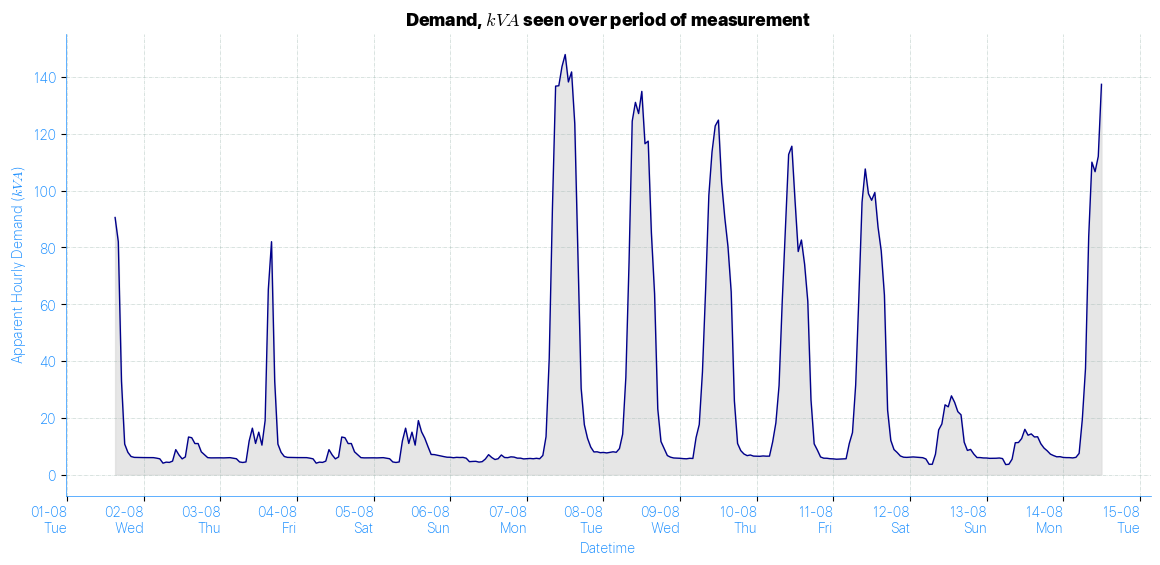

In [66]:
# Plot features.
ticks_color = 'dodgerblue'
load_color = 'darkblue'
fill_color = 'gainsboro'

fig, ax = plt.subplots(figsize = (14, 6))
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
ax.plot(hourly.index, hourly['Stot kVA'], marker='o', markersize = 0, color=load_color, linestyle='-', linewidth = 1 )
plt.fill_between(hourly.index, hourly['Stot kVA'], color=fill_color, alpha=0.7, label='GHI Area')

# Set major ticks at desired frequency (e.g., every 6 hours, daily, etc.)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major ticks for each day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m\n%a'))  # Format with day of week

# Rotate labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='right')

# Customize the plot: Add grid and title
plt.title(r'Demand, $kVA$ seen over period of measurement', fontproperties=eloquia_title)
ax.set_xlabel('Datetime', color=ticks_color)
ax.set_ylabel(r'Apparent Hourly Demand ($kVA$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.savefig('img_typical_demand_profile.png', dpi=330)
plt.show()

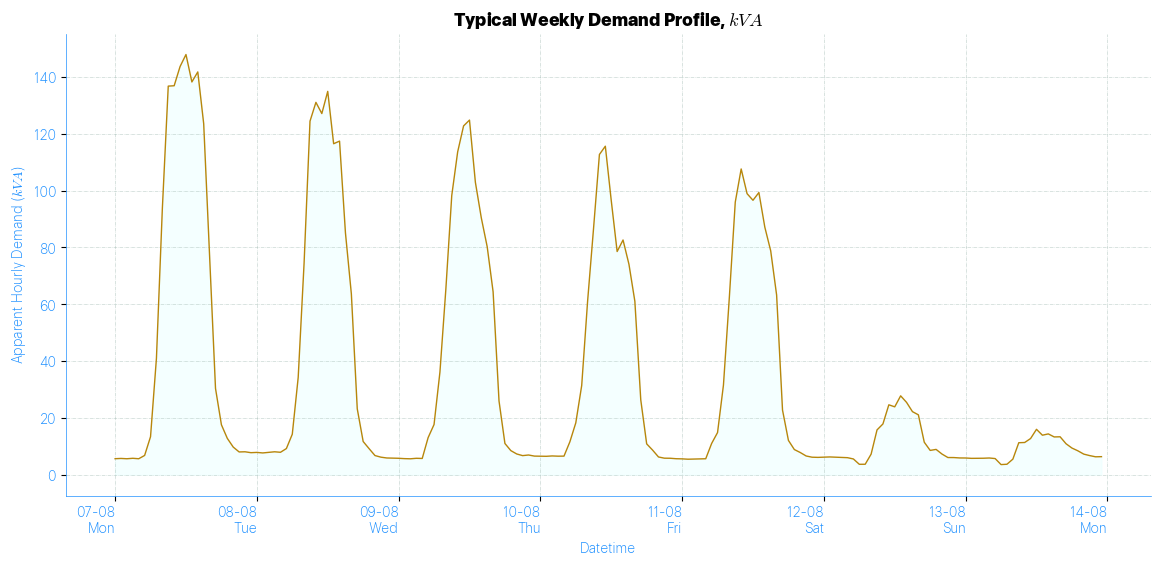

In [67]:
# Plot features.
ticks_color = 'dodgerblue'
load_color = 'darkgoldenrod'
fill_color = 'azure'

# Slices
start_date = '2023-08-07'
end_date = '2023-08-13'
weekly = hourly.loc[start_date:end_date].copy()

fig, ax = plt.subplots(figsize = (14, 6))
ax.plot(weekly.index, weekly['Stot kVA'], marker='o', markersize = 0, color=load_color, linestyle='-', linewidth = 1 )
plt.fill_between(weekly.index, weekly['Stot kVA'], color=fill_color, alpha=0.7, label='GHI Area')

# Set major ticks at desired frequency (e.g., every 6 hours, daily, etc.)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major ticks for each day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m\n%a'))  # Format with day of week

# Rotate labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='right')

# Customize the plot: Add grid and title
plt.title(r'Typical Weekly Demand Profile, $kVA$', fontproperties=eloquia_title)
ax.set_xlabel('Datetime', color=ticks_color)
ax.set_ylabel(r'Apparent Hourly Demand ($kVA$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)

ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.savefig('img_typical_weekly_demand_profile.png', dpi=330)
plt.show()

# Write to file/disk
weekly.to_csv('demand_weekly.csv')

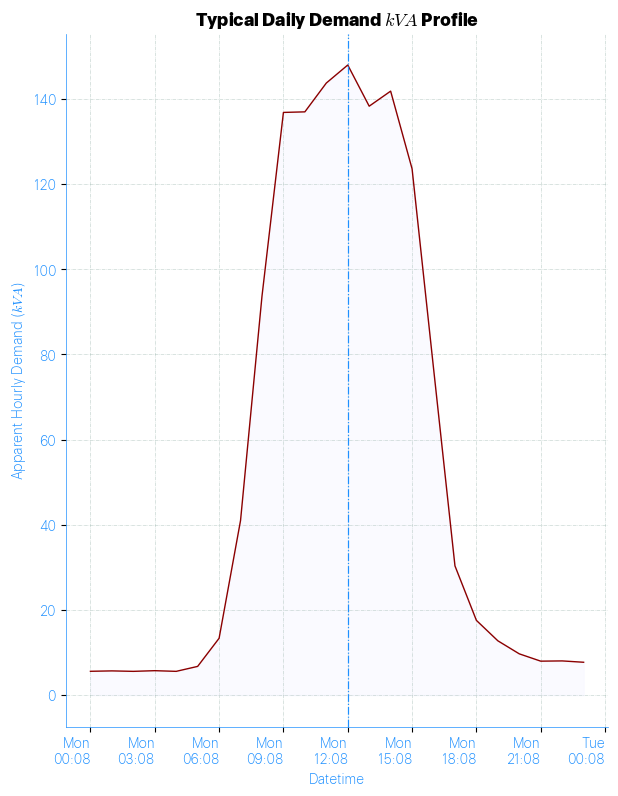

In [68]:
# Plot features.
ticks_color = 'dodgerblue'
load_color = 'darkred'
fill_color = 'ghostwhite'

# Slices
start_date = '2023-08-07'
end_date = '2023-08-07'
daily = hourly.loc[start_date:end_date].copy()

fig, ax = plt.subplots(figsize = (7, 9))
ax.plot(daily.index, daily['Stot kVA'], marker='o', markersize = 0, color=load_color, linestyle='-', linewidth = 1 )
plt.fill_between(daily.index, daily['Stot kVA'], color=fill_color, alpha=0.7, label='GHI Area')

# Format tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a\n%H:%m'))  # Format with day of week
ax.axvline(pd.to_datetime('2023-08-07 12:00:00'), color=ticks_color, linewidth=0.87, linestyle='-.')

# Rotate labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='right')

# Customize the plot: Add grid and title
plt.title(r'Typical Daily Demand $kVA$ Profile', fontproperties=eloquia_title)
ax.set_xlabel('Datetime', color=ticks_color)
ax.set_ylabel(r'Apparent Hourly Demand ($kVA$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)

ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.savefig('img_typical_daily_demand_profile.png', dpi=330)
plt.show()

In [8]:
daily.max()

Stot kVA    147.966667
dtype: float64

In [9]:
daily[daily['Stot kVA'] >= 147]

,Stot kVA
Time,
2023-08-07 12:00:00,147.966667


## SID & TEMP

In [ ]:
gh_sid2023 = pd.read_csv('data/gh_sid2023.csv')
sid = pd.DataFrame({
    'Datetime': pd.to_datetime(gh_sid2023[['Year', 'Month', 'Day', 'Hour', 'Minute']], format='%d/%m/%Y %H:%M'),
    'GHI (W/m2)': gh_sid2023['GHI (W/m2)'],
    'DHI (W/m2)': gh_sid2023['DHI (W/m2)'],
    'DNI (W/m2)': gh_sid2023['DNI (W/m2)'],
    'Temperature (C)': gh_sid2023['Temperature (C )']
})
sid = sid.set_index('Datetime')
sid = sid.resample('h').mean()
display(sid)

,GHI (W/m2),DHI (W/m2),DNI (W/m2),Temperature (C)
Datetime,,,,
2023-01-01 00:00:00,0.0,0.0,0.0,20.35
2023-01-01 01:00:00,0.0,0.0,0.0,19.60
2023-01-01 02:00:00,0.0,0.0,0.0,18.90
2023-01-01 03:00:00,0.0,0.0,0.0,18.30
2023-01-01 04:00:00,0.0,0.0,0.0,17.75
...,...,...,...,...
2023-12-31 19:00:00,0.0,0.0,0.0,21.10
2023-12-31 20:00:00,0.0,0.0,0.0,20.30
2023-12-31 21:00:00,0.0,0.0,0.0,19.50


## ANNUAL LOAD PROFILE ESTIMATION FROM THE Load profile AVAILABLE

In [ ]:
cur_kWh_GHS = pd.read_excel('data/current_consumption.xlsx')
cur_kWh_GHS

,Month,kWh,GHS,GHS/kWh
0,2023-01-01,24672.0000,41206.270532,1.3261
1,2023-02-01,22230.0000,49179.990838,1.7235
2,2023-03-01,22000.0000,48668.547500,1.7235
3,2023-04-01,23078.0000,51023.477578,1.7235
4,2023-05-01,16530.0000,36719.134213,1.7235
5,2023-06-01,16280.0000,33209.572000,2.0399
6,2023-07-01,14394.0000,29362.320600,2.0399
7,2023-08-01,16792.0000,34254.000000,2.0399
8,2023-09-01,21742.0000,56824.283602,2.0399
9,2023-10-01,25162.0000,65666.944117,2.0399


In [12]:
pdf_hrly = hourly.copy()
pdf_hrly['hour'] = pdf_hrly.index.hour
pdf_hrly['day'] = pdf_hrly.index.dayofweek
pdf_hrly['temp'] = sid.loc['2023-08-01 15:00:00':'2023-08-14 12:00:00']['Temperature (C)']
pdf_hrly

,Stot kVA,hour,day,temp
Time,,,,
2023-08-01 15:00:00,90.550000,15,1,27.650
2023-08-01 16:00:00,82.025000,16,1,27.125
2023-08-01 17:00:00,32.886667,17,1,26.400
2023-08-01 18:00:00,10.725000,18,1,25.900
2023-08-01 19:00:00,7.822000,19,1,25.775
...,...,...,...,...
2023-08-14 08:00:00,83.715000,8,0,27.550
2023-08-14 09:00:00,110.050000,9,0,28.900
2023-08-14 10:00:00,106.688333,10,0,30.050


In [13]:
#Mirror the typical load profile seen.
def guess_kVA(dt, dispOn = False):
    hr = dt.hour; day = dt.dayofweek
    df = pdf_hrly[pdf_hrly['day'] == day]
    df = df[df['hour'] == hr]
    if dispOn:
        display(df)
    mn = df['Stot kVA'].min()
    mx = df['Stot kVA'].max()
    
    rand = np.random.uniform(mn, mx)
    return rand#(mx, mn)

In [14]:
# use the randomly generated kVA values to populate a dataframe
timestamps = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00	', freq='h')
estimated_kVA = np.zeros(len(timestamps))
estimated_kVA = timestamps.map(guess_kVA)

annual_kVA = pd.DataFrame({'Time': timestamps, 'Estimated kVA':estimated_kVA})
annual_kVA = annual_kVA.set_index('Time')

annual_kVA['day'] = annual_kVA.index.dayofweek
annual_kVA['hour'] = annual_kVA.index.hour

# separate hot, high loaded days from senile ones
weekdays_kVA = annual_kVA[annual_kVA['day'] < 5] # 0 - 4: [Mon, Fri]
active_range_kVA = weekdays_kVA[weekdays_kVA['hour'].isin(tuple(range(6,19)))]
non_active_range_kVA = annual_kVA[~annual_kVA.index.isin(active_range_kVA.index)]

rough_monthly_kWh = annual_kVA[['Estimated kVA']].copy().resample('ME').sum()
rough_monthly_kWh.columns = ['Estimated kWh']
rough_monthly_kWh['Hot times kWh (a)'] = np.array(active_range_kVA['Estimated kVA'].resample('ME').sum())
rough_monthly_kWh['Off-peak kWh (b)'] = np.array(rough_monthly_kWh['Estimated kWh'] - rough_monthly_kWh['Hot times kWh (a)'])
rough_monthly_kWh['Actual kWh'] = np.array(cur_kWh_GHS['kWh'])

# Reset annual_kVA
annual_kVA = annual_kVA[['Estimated kVA']]

# find k such that: k(a) + b = y
# Where; 
#    a = 'Hot times kWh'
#    b = 'Off-peak kWh'
#    y = 'Actual kWh'
rough_monthly_kWh['k'] = (rough_monthly_kWh['Actual kWh'] - rough_monthly_kWh['Off-peak kWh (b)']) / rough_monthly_kWh['Hot times kWh (a)']

# do: k(a)
sliced = active_range_kVA[['Estimated kVA']].copy()
ratio = list(rough_monthly_kWh['k'].copy())
active_range_kVA['Actual kVA'] = sliced['Estimated kVA'] * sliced.index.month.map(lambda m: ratio[m-1])

# now test if k(a) + b == y
rough_monthly_kWh['Actual kWh (y)'] = np.array(active_range_kVA['Actual kVA'].resample('ME').sum()) + np.array(rough_monthly_kWh['Off-peak kWh (b)'])
rough_monthly_kWh['Test Passed'] = rough_monthly_kWh['Actual kWh (y)'] == rough_monthly_kWh['Actual kWh']                                                                                                      

# Lets merge doing: y = k(a) + b
ac_copy = active_range_kVA[['Actual kVA']].copy() # k(a)
nac_copy = non_active_range_kVA[['Estimated kVA']].copy() # b
nac_copy.columns = ['Actual kVA']
real_annual_hourly_kVA = pd.concat([ac_copy, nac_copy]).sort_index()

real_annual_hourly_kVA

/var/folders/kj/ff7p47s53_d4hp1p2ztl3wzm0000gn/T/ipykernel_2196/3667755381.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_range_kVA['Actual kVA'] = sliced['Estimated kVA'] * sliced.index.month.map(lambda m: ratio[m-1])


,Actual kVA
Time,
2023-01-01 00:00:00,5.939658
2023-01-01 01:00:00,5.746911
2023-01-01 02:00:00,5.848488
2023-01-01 03:00:00,5.840754
2023-01-01 04:00:00,6.012652
...,...
2023-12-31 19:00:00,7.719537
2023-12-31 20:00:00,6.576397
2023-12-31 21:00:00,6.588843


<Axes: xlabel='Time'>

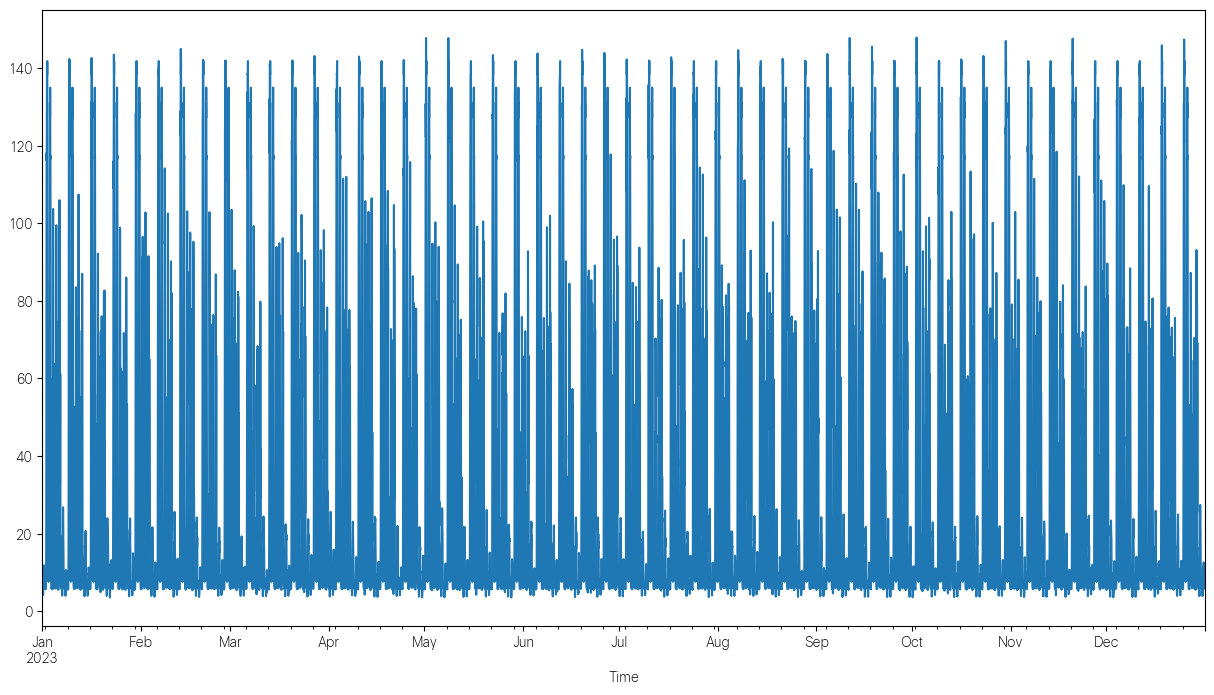

In [15]:
plt.figure(figsize=(15,8))
annual_kVA['Estimated kVA'].plot()

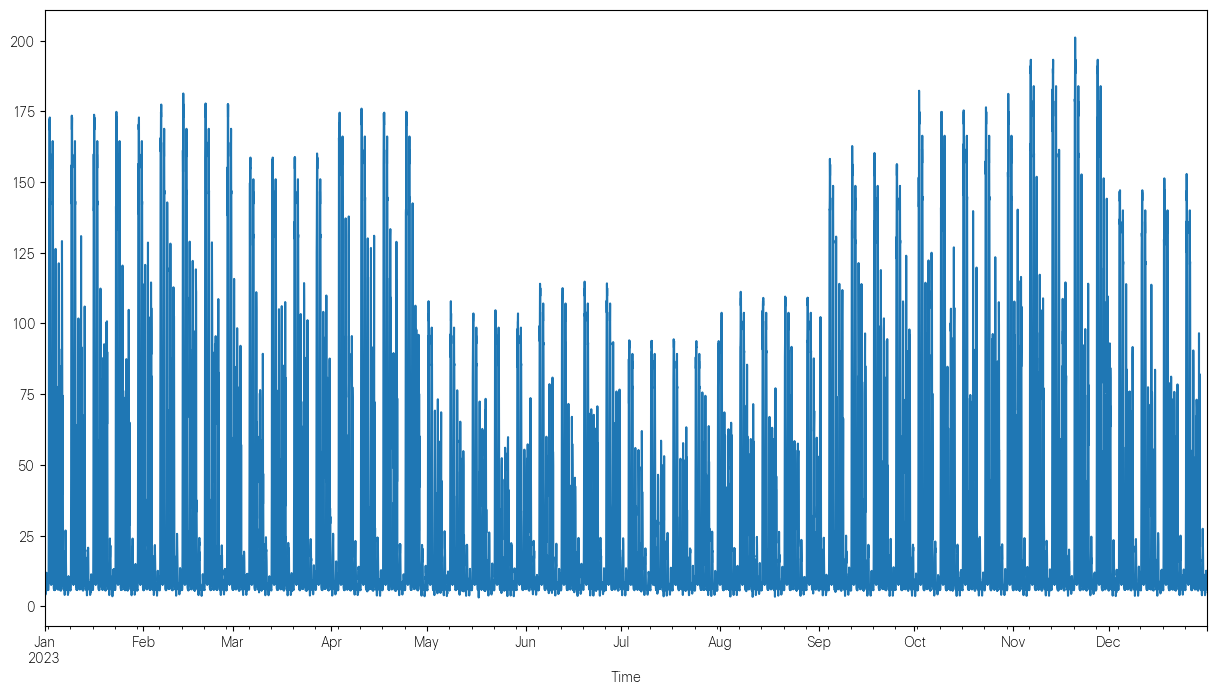

In [16]:
plt.figure(figsize=(15,8))
real_annual_hourly_kVA['Actual kVA'].plot()
plt.show()

In [17]:
rough_monthly_kWh

,Estimated kWh,Hot times kWh (a),Off-peak kWh (b),Actual kWh,k,Actual kWh (y),Test Passed
Time,,,,,,,
2023-01-31,20872.317267,17374.863701,3497.453567,24672.0000,1.218688,24672.0000,True
2023-02-28,18408.770299,15229.923639,3178.846660,22230.0000,1.250903,22230.0000,True
2023-03-31,20023.091663,16650.945495,3372.146168,22000.0000,1.118726,22000.0000,False
2023-04-30,19428.757539,15815.110727,3613.646812,23078.0000,1.230744,23078.0000,True
2023-05-31,21378.139883,17957.638663,3420.501220,16530.0000,0.730024,16530.0000,True
2023-06-30,19664.521386,16366.448894,3298.072493,16280.0000,0.793204,16280.0000,True
2023-07-31,19885.909338,16206.398115,3679.511223,14394.0000,0.661127,14394.0000,True
2023-08-31,20826.517945,17454.042122,3372.475823,16792.0000,0.768849,16792.0000,True
2023-09-30,20059.291072,16597.903859,3461.387213,21742.0000,1.101381,21742.0000,True


In [18]:
mnth_kWh = rough_monthly_kWh[['Actual kWh', 'Actual kWh (y)']]
mnth_kWh.columns = ['Monthly kWh billed', 'Monthly kWh estimated']
mnth_kWh

,Monthly kWh billed,Monthly kWh estimated
Time,,
2023-01-31,24672.0000,24672.0000
2023-02-28,22230.0000,22230.0000
2023-03-31,22000.0000,22000.0000
2023-04-30,23078.0000,23078.0000
2023-05-31,16530.0000,16530.0000
2023-06-30,16280.0000,16280.0000
2023-07-31,14394.0000,14394.0000
2023-08-31,16792.0000,16792.0000
2023-09-30,21742.0000,21742.0000


## DATA

In [ ]:
template_load_profile = real_annual_hourly_kVA[['Actual kVA']].copy()
template_load_profile.columns = ['Demand kVA']

display(template_load_profile)

,Demand kVA
Time,
2023-01-01 00:00:00,5.939658
2023-01-01 01:00:00,5.746911
2023-01-01 02:00:00,5.848488
2023-01-01 03:00:00,5.840754
2023-01-01 04:00:00,6.012652
...,...
2023-12-31 19:00:00,7.719537
2023-12-31 20:00:00,6.576397
2023-12-31 21:00:00,6.588843


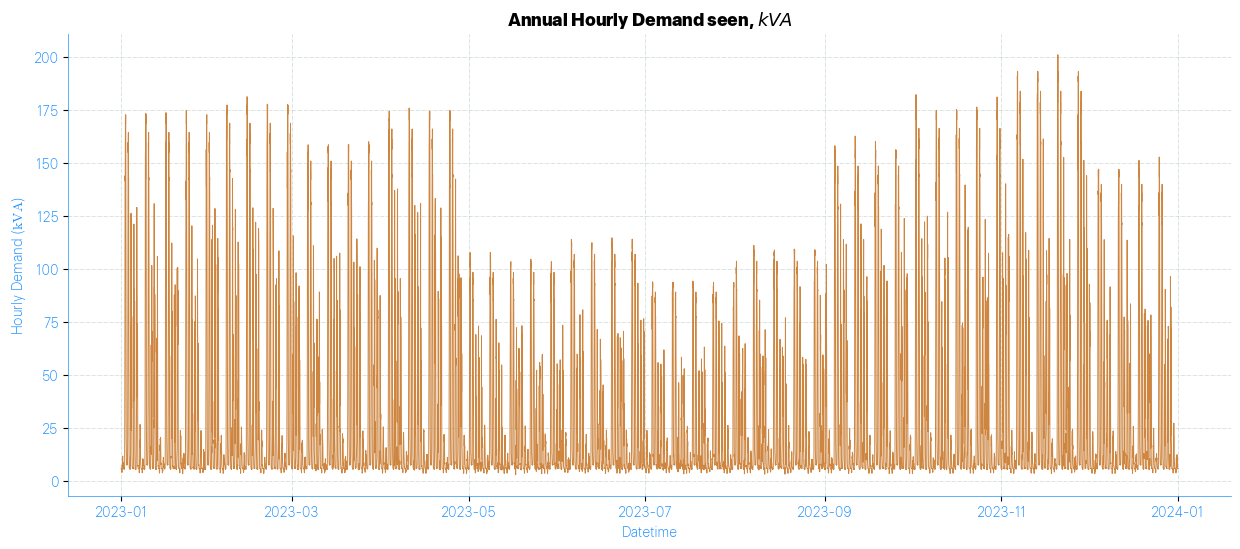

In [20]:
# Customize the plot appearance
border_color = '#A0B8B1'
profile_color = 'peru'
ticks_color = 'dodgerblue'

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot Savings % on the primary y-axis
ax.plot(template_load_profile.index, template_load_profile['Demand kVA'], color=profile_color, linewidth = 0.7, label='Load Profile')
ax.set_xlabel(r'Datetime', color=ticks_color)
ax.set_ylabel(r'Hourly Demand ($\text{kVA}$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title('Annual Hourly Demand seen, $kVA$', fontproperties=eloquia_title)

ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Show the plot
plt.savefig('img_annual_hourly_load_profile.png', dpi = 320)
plt.show()

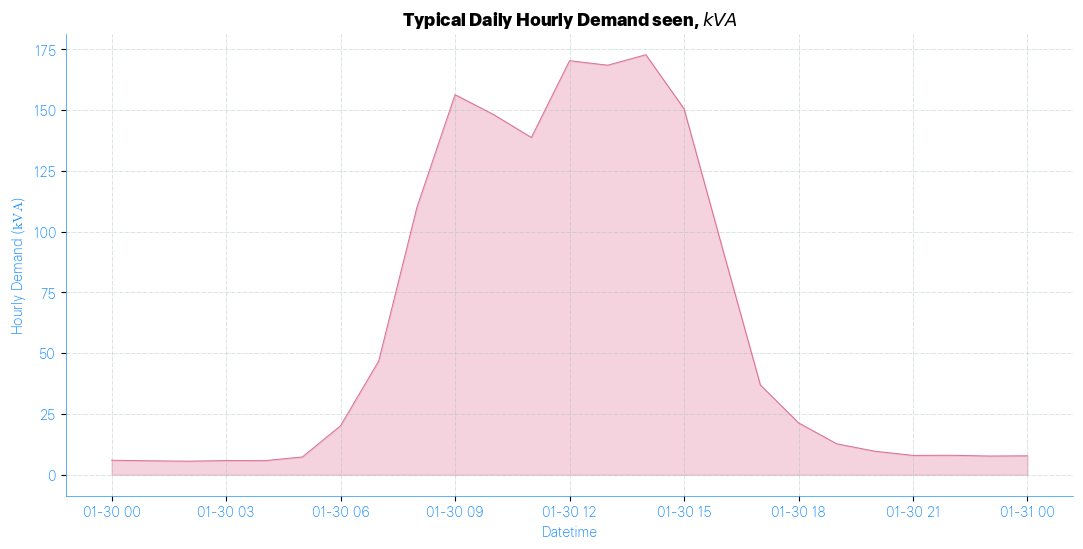

In [21]:
# Select for any one day
start_date = '2023-01-30 00:00:00'
end_date = '2023-01-31 00:00:00'
one_day = template_load_profile.loc[start_date:end_date]

# Customize the plot appearance
border_color = '#A0B8B1'
profile_color = 'palevioletred'
ticks_color = 'dodgerblue'

# Create figure and axis
fig, ax = plt.subplots(figsize=(13, 6))

# Plot Savings % on the primary y-axis
ax.plot(one_day.index, one_day['Demand kVA'], color=profile_color, linewidth = 0.7, label='Load Profile')
plt.fill_between(one_day.index, one_day['Demand kVA'], color=profile_color, alpha = 0.3)
ax.set_xlabel(r'Datetime', color=ticks_color)
ax.set_ylabel(r'Hourly Demand ($\text{kVA}$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title('Typical Daily Hourly Demand seen, $kVA$', fontproperties=eloquia_title)

#ax1.spines['top'].set_color(border_color)     # Top border
ax.spines['right'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Show the plot
plt.savefig('img_typical_daily_demand_profile[corrected].png', dpi = 320)
plt.show()

## SOLAR IRRADIATION DATA

### Evaluating Total Irradiation on the panel

In [ ]:
# For loc of study
latitude = 9.3742287
longitude = -0.8842215
altitude = 134
albedo = 0.2
angle_tilt = 30

# Ib = DNI*cos(angle_zenith)
# Id = DHI*(1+cos(angle_tilt))/2
# Ir = GHI*ground_albedo*(1-cos(angle_tilt))/2
# Itotal = Ib + Id + Ir

# Estimate solar positions from PVLib
solar_pos = pvl.solarposition.get_solarposition(sid.index, latitude, longitude, altitude)

# Convert angles to radians
angle_tilt = np.full(len(sid), np.radians(37))
angle_zenith = np.radians(solar_pos['zenith'])
    
# Total solar irradiance on the tilted panel
sid['I (W/m2)'] = (sid['DNI (W/m2)'] * np.cos(angle_zenith)) + (sid['DHI (W/m2)'] * (1 + np.cos(angle_tilt)) / 2) + (sid['GHI (W/m2)'] * albedo * (1 - np.cos(angle_tilt)) / 2)
template_sid = sid[['I (W/m2)', 'Temperature (C)']].copy()
template_sid['I (W/m2)'] /= 1000.0
template_sid.columns = ['I (kW/m2)','Temperature (C)']
display(sid)

,GHI (W/m2),DHI (W/m2),DNI (W/m2),Temperature (C),I (W/m2)
Datetime,,,,,
2023-01-01 00:00:00,0.0,0.0,0.0,20.35,0.0
2023-01-01 01:00:00,0.0,0.0,0.0,19.60,0.0
2023-01-01 02:00:00,0.0,0.0,0.0,18.90,0.0
2023-01-01 03:00:00,0.0,0.0,0.0,18.30,0.0
2023-01-01 04:00:00,0.0,0.0,0.0,17.75,0.0
...,...,...,...,...,...
2023-12-31 19:00:00,0.0,0.0,0.0,21.10,0.0
2023-12-31 20:00:00,0.0,0.0,0.0,20.30,0.0
2023-12-31 21:00:00,0.0,0.0,0.0,19.50,0.0


In [23]:
template_sid

,I (kW/m2),Temperature (C)
Datetime,,
2023-01-01 00:00:00,0.0,20.35
2023-01-01 01:00:00,0.0,19.60
2023-01-01 02:00:00,0.0,18.90
2023-01-01 03:00:00,0.0,18.30
2023-01-01 04:00:00,0.0,17.75
...,...,...
2023-12-31 19:00:00,0.0,21.10
2023-12-31 20:00:00,0.0,20.30
2023-12-31 21:00:00,0.0,19.50


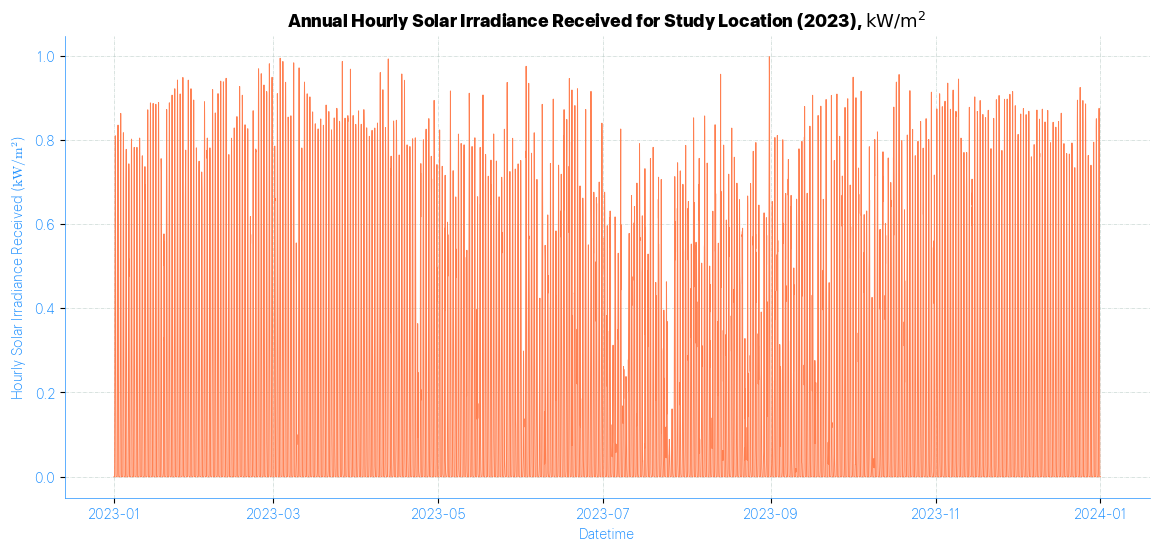

In [24]:
# PLOT OF ANNUAL HOURLY SOLAR IRRADIANCE RECEIVED 
# Customize the plot appearance
border_color = '#A0B8B1'
sid_color = 'coral'
ticks_color = 'dodgerblue'

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot Savings % on the primary y-axis
ax.plot(template_sid.index, template_sid['I (kW/m2)'], color=sid_color, linewidth = 0.7, label='Solar Irradiance')
ax.set_xlabel(r'Datetime', color=ticks_color)
ax.set_ylabel(r'Hourly Solar Irradiance Received ($\text{kW/m}^2$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title(r'Annual Hourly Solar Irradiance Received for Study Location (2023), $\text{kW/m}^2$', fontproperties=eloquia_title)

#ax1.spines['top'].set_color(border_color)     # Top border
ax.spines['right'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Show the plot
plt.savefig('img_annual_hourly_sid_received_2023[NSRDB].png', dpi = 320)
plt.show()

## PANEL DATA

### Panel Specs

In [25]:
n_max = 500 #pieces of 700 W panels

# specs of one panel
PV_kW = 0.7 # Size of one panel (kW)
PV_eff = 0.225 # Efficiency of one panel
PV_A = 2.963 # Area of one Panel (m^2)
PV_P_tderate = -0.003 # per each C rise above 25 C
NOCT = 45

# specs of all arrays
PV_kW_tot = n_max * PV_kW # Total size of all the panels (kW)
PV_A_tot = PV_A * n_max # 2109.656 m2 

# System losses
inverter_eff = 0.988  # 95%
wiring_losses = 0.97  # 97%
soiling_losses = 0.85  # 85%
other_losses = 0.93  # 93%

effective_eff = inverter_eff * wiring_losses * soiling_losses * other_losses

### Optimization

The problem of this optimization is to find the number of panels that at the rated capacity and load consumptions, per the net metering code, at calendar year end no compensation offered for any excess kWh of electricity produced, so what value of n will ensure that at year end, no excess kWh will be left. <br>

<b> Algorithm </b> <br>
<ol> 
    <li>Randomly select n between [0, 712]</li>
    <li>Evaluate PV power production</li>
    <li>Estimate Deficit kW</li>
    <li>Evaluate the annual sum deficit kWh, sum(deficit_kWh)</li>
    <li>If sum(deficit_kWh) != 0 repeat</li>
</ol>

In [27]:
def get_annual_deficit_kWh(numb):
    # get the hourly load profile
    this_profile = template_load_profile.copy()

    # evaluate temperature derating
    cell_temp = template_sid['Temperature (C)'] + ((NOCT - 20) / 800 ) * template_sid['I (kW/m2)']
    t_derate_factor = 1 + PV_P_tderate * (cell_temp - 25)
    
    # evaluate the hourly solar kW generation.
    this_profile['Total PV Production kW'] = numb * PV_A * PV_eff * np.array(template_sid['I (kW/m2)']) * t_derate_factor

    # Evaluate the leftover after losses using effective_eff: 0.76
    # this is because, whatever value the panel generates, we will loose 24%, so the leftover is what is 
    # used by the grid.
    # this_profile['Actual PV Usable kW'] = this_profile['Total PV Production kW'] * effective_eff
    this_profile['Inverter Output kW'] = this_profile['Total PV Production kW'] * effective_eff

    # evaluate losses seen on the network.
    this_profile['Loss PV kW'] = this_profile['Total PV Production kW'] * (1 - effective_eff)

    # evaluate deficit after the present load is met.
    this_profile['Deficit kW'] = this_profile['Inverter Output kW'] - this_profile['Demand kVA']
    
    return this_profile

In [28]:
# Test the function above
get_annual_deficit_kWh(270)#.columns

,Demand kVA,Total PV Production kW,Inverter Output kW,Loss PV kW,Deficit kW
Time,,,,,
2023-01-01 00:00:00,5.939658,0.0,0.0,0.0,-5.939658
2023-01-01 01:00:00,5.746911,0.0,0.0,0.0,-5.746911
2023-01-01 02:00:00,5.848488,0.0,0.0,0.0,-5.848488
2023-01-01 03:00:00,5.840754,0.0,0.0,0.0,-5.840754
2023-01-01 04:00:00,6.012652,0.0,0.0,0.0,-6.012652
...,...,...,...,...,...
2023-12-31 19:00:00,7.719537,0.0,0.0,0.0,-7.719537
2023-12-31 20:00:00,6.576397,0.0,0.0,0.0,-6.576397
2023-12-31 21:00:00,6.588843,0.0,0.0,0.0,-6.588843


In [29]:
# A function to use the above function
def eval_annual_deficit_kWh(numb, disp = False):
    tp = get_annual_deficit_kWh(numb)
    if disp:
        display(tp)

    return (tp['Demand kVA'].sum(), tp['Inverter Output kW'].sum(), tp['Deficit kW'].sum())

<br>
<br>

#### Number of panels vs Output

In [30]:
# Evaluating how number of panels affects output.
kWh_real = []; kWh_PV = []; kWh_deficit = []
for ___ in range(0, n_max):
    kWh_r, kWh_p, kWh_d = eval_annual_deficit_kWh(___)
    kWh_real.append(kWh_r)
    kWh_PV.append(kWh_p)
    kWh_deficit.append(kWh_d)

deficits = {'n':np.arange(0, n_max, 1), 'Real, kWh':kWh_real, 'PV, kWh':kWh_PV, 'Deficit, kWh':kWh_deficit}
deficits  = pd.DataFrame(deficits)

# reveal table
display(deficits)

,n,"Real, kWh","PV, kWh","Deficit, kWh"
0,0,248204.7952,0.000000,-248204.795200
1,1,248204.7952,912.326433,-247292.468767
2,2,248204.7952,1824.652865,-246380.142335
3,3,248204.7952,2736.979298,-245467.815902
4,4,248204.7952,3649.305730,-244555.489470
...,...,...,...,...
495,495,248204.7952,451601.584129,203396.788929
496,496,248204.7952,452513.910561,204309.115361
497,497,248204.7952,453426.236994,205221.441794
498,498,248204.7952,454338.563427,206133.768227


In [31]:
# positive deficits
deficits[deficits['Deficit, kWh'] > 0]

,n,"Real, kWh","PV, kWh","Deficit, kWh"
273,273,248204.7952,249065.116095,860.320895
274,274,248204.7952,249977.442528,1772.647328
275,275,248204.7952,250889.768960,2684.973760
276,276,248204.7952,251802.095393,3597.300193
277,277,248204.7952,252714.421826,4509.626626
...,...,...,...,...
495,495,248204.7952,451601.584129,203396.788929
496,496,248204.7952,452513.910561,204309.115361
497,497,248204.7952,453426.236994,205221.441794
498,498,248204.7952,454338.563427,206133.768227


In [32]:
# negative deficits
deficits[deficits['Deficit, kWh'] < 0]

,n,"Real, kWh","PV, kWh","Deficit, kWh"
0,0,248204.7952,0.000000,-248204.795200
1,1,248204.7952,912.326433,-247292.468767
2,2,248204.7952,1824.652865,-246380.142335
3,3,248204.7952,2736.979298,-245467.815902
4,4,248204.7952,3649.305730,-244555.489470
...,...,...,...,...
268,268,248204.7952,244503.483932,-3701.311268
269,269,248204.7952,245415.810365,-2788.984835
270,270,248204.7952,246328.136798,-1876.658402
271,271,248204.7952,247240.463230,-964.331970


In [33]:
# finding the needed n to be allowable in spending using Clause 37: NO annual deficits.
n = deficits[deficits['Deficit, kWh'] > 0]['n'].iloc[0] - 1
n_clause37 = n
n

272

<br>
<br>

### Tariff Estimations

In [35]:
# Cost of energy estimations
taxes = 1.261144064342118
service_charge = 500.00

def energy_import_cost(consumption_kwh):
    if consumption_kwh < 0:
        consumption_kwh *= -1
    cost_energy_import = (1.239102 * consumption_kwh * taxes) + service_charge
    return cost_energy_import

def energy_export_cost(exported_kwh):
    if exported_kwh < 0:
        exported_kwh *= -1
    cost_energy_export = (0.826068 * exported_kwh * taxes) + service_charge
    return cost_energy_export

In [42]:
def get_balance_sheet(_n, show = False):
    tabl = get_annual_deficit_kWh(_n)[['Demand kVA', 'Deficit kW']].copy()
    defs = tabl[['Deficit kW']].copy()

    if show:
        print(f'At n = {_n}, Total Annual Deficit = {defs.sum()}')

    # Estimate the kWh load needed
    balance_sheet = tabl[['Demand kVA']].copy()
    balance_sheet = balance_sheet.resample('ME').sum()
    balance_sheet.columns = ['Actual Monthly kWh']

    # Estimate monthly kWh produced by PV
    balance_sheet['Monthly PV kWh'] = np.array(get_annual_deficit_kWh(_n)[['Inverter Output kW']].resample('ME').sum())

    # Estimate the Monthly Deficit kWh
    balance_sheet['(Monthly Deficit kWh)'] = balance_sheet['Monthly PV kWh'] - balance_sheet['Actual Monthly kWh']

    # Estimate monthly Imported kWh
    balance_sheet['Imported kWh'] = defs[defs['Deficit kW'] < 0].copy().resample('ME').sum()

    # Estimate monthly Exported kWh
    balance_sheet['Exported kWh'] = defs[defs['Deficit kW'] > 0].copy().resample('ME').sum()

    balance_sheet['Imported GHS'] = balance_sheet['Imported kWh'].apply(energy_import_cost)
    balance_sheet['Exported GHS'] = balance_sheet['Exported kWh'].apply(energy_export_cost)
    balance_sheet['Net Monthly GHS'] = balance_sheet['Imported GHS'] - balance_sheet['Exported GHS']
    balance_sheet['Present Billed GHS'] = np.array(cur_kWh_GHS['GHS'])
    balance_sheet['Savings GHS'] = balance_sheet['Present Billed GHS'] - balance_sheet['Net Monthly GHS']
    balance_sheet['Savings (%)'] = balance_sheet['Savings GHS'] / balance_sheet['Present Billed GHS']
    
    return balance_sheet

In [40]:
def get_annual_savings(_n, show = False):
    # balance sheet
    bs = get_balance_sheet(_n, show)

    # evaluate total savings
    annual_billed = bs['Present Billed GHS'].sum()
    annual_savings = bs['Savings GHS'].sum()
    annual_paid = bs['Net Monthly GHS'].sum()

    savings_perc = annual_savings / annual_billed
    return (annual_billed, annual_savings, annual_paid, savings_perc)

In [43]:
get_annual_savings(281)

(562796.5997373416, 522526.0925525876, 40270.507184754126, 0.9284457169720849)

In [44]:
# Optimize for n using Clause 36: no monthly defrayment.
n_clause36 = n
find_n = get_balance_sheet(n)[['Net Monthly GHS']].copy()
while (len(find_n[find_n['Net Monthly GHS'] < 0]) > 0):
    n = n - 1
    find_n = get_balance_sheet(n)[['Net Monthly GHS']].copy()
    n_clause36 = n
print(n)

246


In [45]:
df_balance_sheet_n_clause37 = get_balance_sheet(n_clause37)
df_balance_sheet_n_clause37.to_csv('bal_sht_nclause37.csv')
display(df_balance_sheet_n_clause37)

,Actual Monthly kWh,Monthly PV kWh,(Monthly Deficit kWh),Imported kWh,Exported kWh,Imported GHS,Exported GHS,Net Monthly GHS,Present Billed GHS,Savings GHS,Savings (%)
Time,,,,,,,,,,,
2023-01-31,24672.0000,23129.549066,-1542.450934,-10108.046593,8565.595659,16295.704237,9423.558368,6872.145869,41206.270532,34334.124663,0.833226
2023-02-28,22230.0000,21581.248648,-648.751352,-8723.221130,8074.469778,14131.656689,8911.907965,5219.748724,49179.990838,43960.242114,0.893864
2023-03-31,22000.0000,23924.119526,1924.119526,-7582.033862,9506.153388,12348.339172,10403.422715,1944.916457,48668.547500,46723.631043,0.960038
2023-04-30,23078.0000,21744.532225,-1333.467775,-9340.495093,8007.027318,15096.262152,8841.647035,6254.615118,51023.477578,44768.862460,0.877417
2023-05-31,16530.0000,21197.995328,4667.995328,-4823.754814,9491.750142,8038.014754,10388.417546,-2350.402792,36719.134213,39069.537005,1.064010
2023-06-30,16280.0000,19545.758786,3265.758786,-5039.411631,8305.170417,8375.018671,9152.249758,-777.231087,33209.572000,33986.803087,1.023404
2023-07-31,14394.0000,15016.678074,622.678074,-5674.187156,6296.865229,9366.973581,7060.015981,2306.957600,29362.320600,27055.363000,0.921431
2023-08-31,16792.0000,17453.182528,661.182528,-6535.567130,7196.749658,10713.040122,7997.507260,2715.532862,34254.000000,31538.467138,0.920724
2023-09-30,21742.0000,17746.226326,-3995.773674,-9327.408338,5331.634663,15075.811661,6054.447701,9021.363960,56824.283602,47802.919642,0.841241


In [46]:
df_balance_sheet_n_clause36 = get_balance_sheet(n_clause36)
df_balance_sheet_n_clause36.to_csv('bal_sht_nclause36.csv')
display(df_balance_sheet_n_clause36)

,Actual Monthly kWh,Monthly PV kWh,(Monthly Deficit kWh),Imported kWh,Exported kWh,Imported GHS,Exported GHS,Net Monthly GHS,Present Billed GHS,Savings GHS,Savings (%)
Time,,,,,,,,,,,
2023-01-31,24672.0000,20918.636287,-3753.363713,-11101.504802,7348.141089,17848.167603,8155.225453,9692.942150,41206.270532,31513.328382,0.764770
2023-02-28,22230.0000,19518.335174,-2711.664826,-9615.448654,6903.783828,15525.928268,7692.298166,7833.630102,49179.990838,41346.360736,0.840715
2023-03-31,22000.0000,21637.255160,-362.744840,-8451.415310,8088.670470,13706.909504,8926.702115,4780.207389,48668.547500,43888.340111,0.901780
2023-04-30,23078.0000,19666.010762,-3411.989238,-10244.390003,6832.400765,16508.766192,7617.931951,8890.834241,51023.477578,42132.643337,0.825750
2023-05-31,16530.0000,19171.716363,2641.716363,-5378.255824,8019.972187,8904.525793,8855.132879,49.392914,36719.134213,36669.741299,0.998655
2023-06-30,16280.0000,17677.414196,1397.414196,-5612.248655,7009.662851,9270.183144,7802.601953,1467.581191,33209.572000,31741.990809,0.955808
2023-07-31,14394.0000,13581.260317,-812.739683,-6085.659547,5272.919864,10009.975781,5993.279166,4016.696615,29362.320600,25345.623985,0.863202
2023-08-31,16792.0000,15784.863610,-1007.136390,-7115.202221,6108.065831,11618.827839,6863.326513,4755.501326,34254.000000,29498.498674,0.861169
2023-09-30,21742.0000,16049.895868,-5692.104132,-10155.211937,4463.107805,16369.408865,5149.624449,11219.784416,56824.283602,45604.499186,0.802553


<br>
<br>

### Balance Sheet

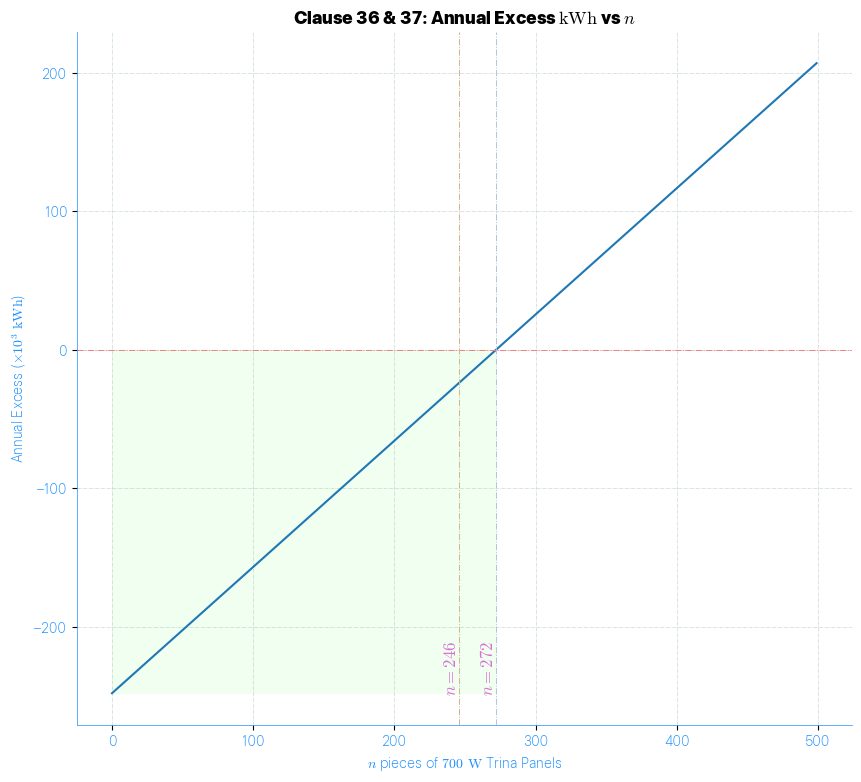

In [69]:
# Customize the plot appearance
border_color = '#A0B8B1'
n_color = 'steelblue'
hline_color = 'lightcoral'
vline_color1 = 'lightsteelblue'
vline_color2 = 'tan'
fill_color = 'honeydew'
ticks_color = 'dodgerblue'

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 9))

plt.plot(deficits['n'], deficits['Deficit, kWh']/1000)
ax.axhline(0, color=hline_color, linewidth=0.7, linestyle = '-.')  
ax.axvline(n_clause37, color=vline_color1, linewidth=0.7, linestyle = '-.')  
ax.text(n_clause37-6, -250, rf"$n = {n_clause37}$", color="orchid", fontsize=12, fontweight="bold", rotation=90, ha='center', va='bottom')

ax.axvline(n_clause36, color=vline_color2, linewidth=0.7, linestyle = '-.')
ax.text(n_clause36-6, -250, rf"$n = {n_clause36}$", color="orchid", fontsize=12, fontweight="bold", rotation=90, ha='center', va='bottom')

plt.fill_between(deficits['n'][:n_clause37], min(deficits['Deficit, kWh']) / 1000, 0, color=fill_color, alpha=1)
#plt.fill_between(deficits['n'][:n_clause37], deficits['Deficit, kWh'][:n_clause37] / 1000, 0, color=fill_color, alpha=1)
ax.set_xlabel(r'$n$ pieces of $700\text{ W}$ Trina Panels', color=ticks_color)
ax.set_ylabel(r'Annual Excess ($\times 10^3 \text{ kWh}$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title(r'Clause 36 & 37: Annual Excess $\text{kWh}$ vs $n$', fontproperties=eloquia_title)

ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Show the plot
plt.savefig('img_annual_deficit_kWh_vs_n.png', dpi = 320)
plt.show()

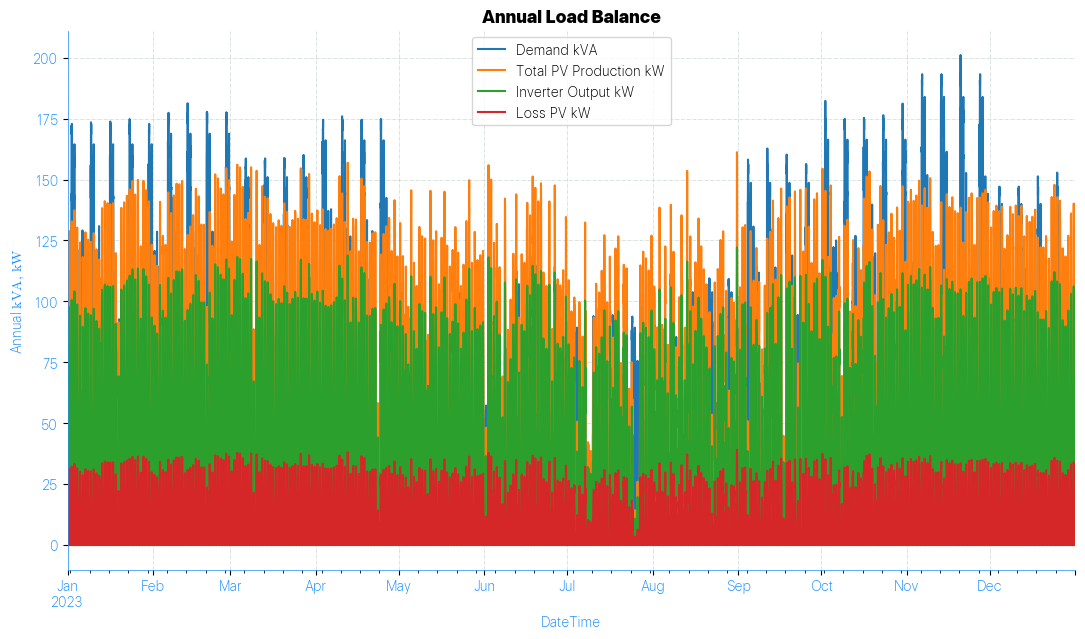

In [48]:
# Customize the plot appearance
ticks_color = 'dodgerblue'

# Create figure and axis
fig, ax = plt.subplots(figsize=(13, 7))

# Plot of all demand values.
df = get_annual_deficit_kWh(n_clause36)[['Demand kVA', 'Total PV Production kW', 'Inverter Output kW', 'Loss PV kW']]

df.plot(ax=ax)

ax.set_xlabel('DateTime', color=ticks_color)
ax.set_ylabel(r'Annual $\text{kVA, kW}$', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title(r'Annual Load Balance', fontproperties=eloquia_title)

ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Show the plot
plt.savefig('img_annual_load_balance_kW.png', dpi = 320)
plt.show()

## ECONOMICS OF IMPORTS VS EXPORTS

### Economic balance sheet

Imports occur at night when the deficits are negative, and at times in the day when the PV supply is not enough to meet the demand, at which time the net meter will import from the grid. <br> However, from the analysis, we have found that, at $n = [271, 272]$, deficits are $[-9 \text{ kWh}, 907 \text{ kWh}]$. Hence we run the analysis for when $n = 272$ to see how much must be imported each month.

In [50]:
typical_generation_profile = get_annual_deficit_kWh(n_clause36)
typical_generation_profile

,Demand kVA,Total PV Production kW,Inverter Output kW,Loss PV kW,Deficit kW
Time,,,,,
2023-01-01 00:00:00,5.939658,0.0,0.0,0.0,-5.939658
2023-01-01 01:00:00,5.746911,0.0,0.0,0.0,-5.746911
2023-01-01 02:00:00,5.848488,0.0,0.0,0.0,-5.848488
2023-01-01 03:00:00,5.840754,0.0,0.0,0.0,-5.840754
2023-01-01 04:00:00,6.012652,0.0,0.0,0.0,-6.012652
...,...,...,...,...,...
2023-12-31 19:00:00,7.719537,0.0,0.0,0.0,-7.719537
2023-12-31 20:00:00,6.576397,0.0,0.0,0.0,-6.576397
2023-12-31 21:00:00,6.588843,0.0,0.0,0.0,-6.588843


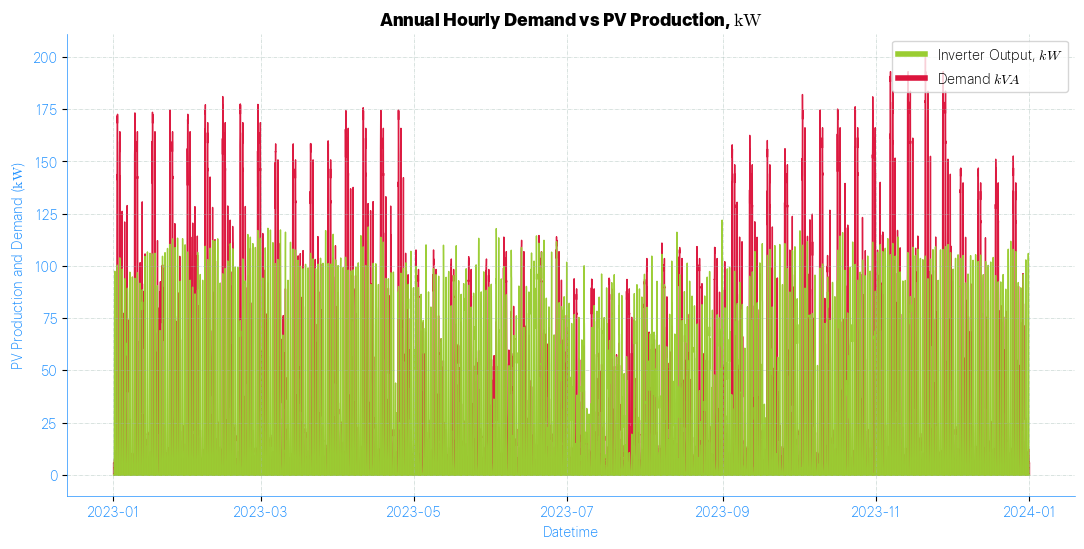

In [70]:
# Customize the plot appearance
border_color = '#A0B8B1'
demand_color = 'crimson'
production_color = 'yellowgreen'#'sandybrown'
ticks_color = 'dodgerblue'

# Create figure and axis
fig, ax = plt.subplots(figsize=(13, 6))

# Plot Savings % on the primary y-axis
plt.fill_between(typical_generation_profile.index, typical_generation_profile['Demand kVA'], color=demand_color, alpha = 0.97, label='Demand kVA')
plt.fill_between(typical_generation_profile.index, typical_generation_profile['Inverter Output kW'], color=production_color, alpha = 0.97, label='Inverter Output')

ax.set_xlabel(r'Datetime', color=ticks_color)
ax.set_ylabel(r'PV Production and Demand ($\text{kW}$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title(r'Annual Hourly Demand vs PV Production, $\text{kW}$', fontproperties=eloquia_title)

#ax1.spines['top'].set_color(border_color)     # Top border
ax.spines['right'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# legend
legend_elements = [Line2D([0], [0], color=production_color, lw=4, label='Inverter Output, $kW$'),
                   Line2D([0], [0], color=demand_color, lw=4, label='Demand $kVA$')]

ax.legend(handles=legend_elements, loc='upper right', frameon=True)

# Show the plot
plt.savefig('img_annual_production_vs_consumption.png', dpi = 320)
plt.show()

<br><br>

### Plots on Balance Sheet

In [54]:
bal_sheet = get_balance_sheet(n_clause36)
bal_sheet

,Actual Monthly kWh,Monthly PV kWh,(Monthly Deficit kWh),Imported kWh,Exported kWh,Imported GHS,Exported GHS,Net Monthly GHS,Present Billed GHS,Savings GHS,Savings (%)
Time,,,,,,,,,,,
2023-01-31,24672.0000,20918.636287,-3753.363713,-11101.504802,7348.141089,17848.167603,8155.225453,9692.942150,41206.270532,31513.328382,0.764770
2023-02-28,22230.0000,19518.335174,-2711.664826,-9615.448654,6903.783828,15525.928268,7692.298166,7833.630102,49179.990838,41346.360736,0.840715
2023-03-31,22000.0000,21637.255160,-362.744840,-8451.415310,8088.670470,13706.909504,8926.702115,4780.207389,48668.547500,43888.340111,0.901780
2023-04-30,23078.0000,19666.010762,-3411.989238,-10244.390003,6832.400765,16508.766192,7617.931951,8890.834241,51023.477578,42132.643337,0.825750
2023-05-31,16530.0000,19171.716363,2641.716363,-5378.255824,8019.972187,8904.525793,8855.132879,49.392914,36719.134213,36669.741299,0.998655
2023-06-30,16280.0000,17677.414196,1397.414196,-5612.248655,7009.662851,9270.183144,7802.601953,1467.581191,33209.572000,31741.990809,0.955808
2023-07-31,14394.0000,13581.260317,-812.739683,-6085.659547,5272.919864,10009.975781,5993.279166,4016.696615,29362.320600,25345.623985,0.863202
2023-08-31,16792.0000,15784.863610,-1007.136390,-7115.202221,6108.065831,11618.827839,6863.326513,4755.501326,34254.000000,29498.498674,0.861169
2023-09-30,21742.0000,16049.895868,-5692.104132,-10155.211937,4463.107805,16369.408865,5149.624449,11219.784416,56824.283602,45604.499186,0.802553


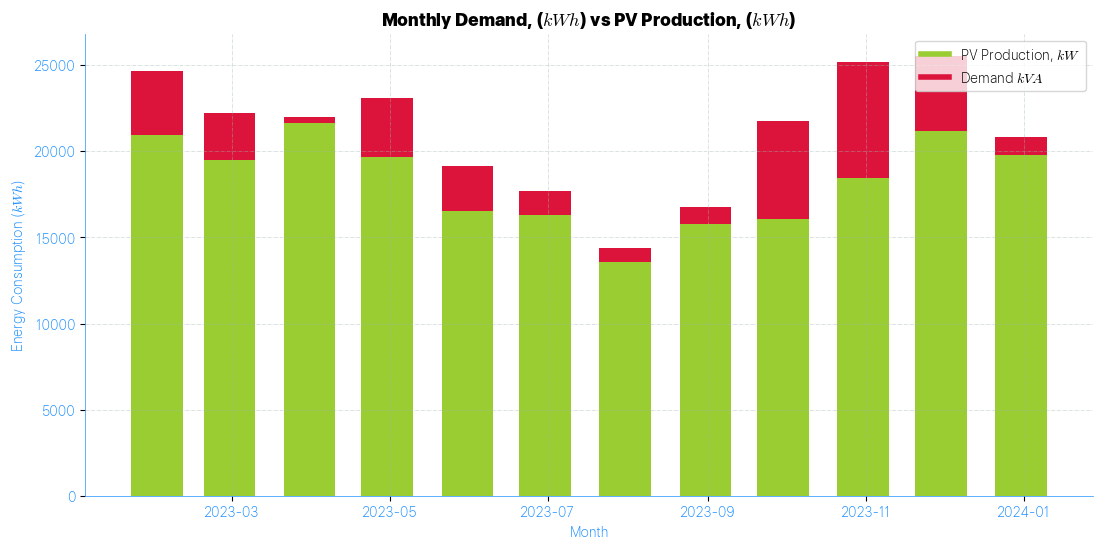

In [71]:
# Plot 1: Annual Monthly PV kWh on Demand kWh
# Customize the plot appearance
grid_color = '#A0B8B1'
demand_color = 'crimson'
production_color = 'yellowgreen'#'sandybrown'
ticks_color = 'dodgerblue'

# Sort by index (Datetime) to maintain order
df = bal_sheet.sort_index()

# Create the figure
fig, ax = plt.subplots(figsize=(13, 6))

# Stacked bar chart using index as x-axis
ax.bar(df.index, df['Monthly PV kWh'], width=20, color=production_color, label='PV Production')
ax.bar(df.index, df['Actual Monthly kWh'] - df['Monthly PV kWh'], bottom=df['Monthly PV kWh'], width=20, color=demand_color, label='Energy Demand')

# Labels and formatting
ax.set_xlabel('Month', color=ticks_color)
ax.set_ylabel('Energy Consumption ($kWh$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

ax.spines['top'].set_color(ticks_color)     # Top border
ax.spines['right'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title(r"Monthly Demand, ($kWh$) vs PV Production, ($kWh$)", fontproperties=eloquia_title)

# legend
legend_elements = [Line2D([0], [0], color=production_color, lw=4, label='PV Production, $kW$'), Line2D([0], [0], color=demand_color, lw=4, label='Demand $kVA$')]
ax.legend(handles=legend_elements, loc='upper right', frameon=True)

# Show the plot
plt.savefig('img_monthly_production_vs_consumption[bar].png', dpi = 320)
plt.show()
# Show the plot
plt.show()

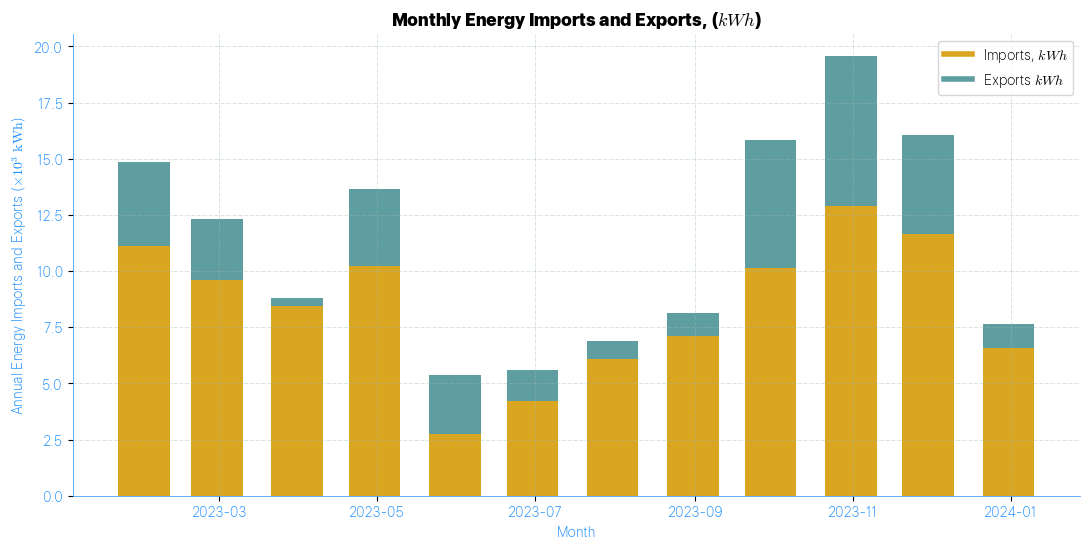

In [72]:
# Plot 2: Annual Monthly Imports kWh vs Export kWh
# Customize the plot appearance
grid_color = '#A0B8B1'
imports_color = 'goldenrod'
exports_color = 'cadetblue'
ticks_color = 'dodgerblue'

# Sort by index (Datetime) to maintain order
df = bal_sheet.sort_index()
df['Imported kWh'] *= -1/1000
df['Exported kWh'] *= 1/1000

# Create the figure
fig, ax = plt.subplots(figsize=(13, 6))

# Stacked bar chart using index as x-axis
ax.bar(df.index, df['Imported kWh'], width=20, color=imports_color)
ax.bar(df.index, df['Imported kWh'] - df['Exported kWh'], bottom=df['Imported kWh'], 
       width=20, color=exports_color, label='Exported kWh')

# Labels and formatting
ax.set_xlabel('Month', color=ticks_color)
ax.set_ylabel(r'Annual Energy Imports and Exports ($\times 10^3 \text{ kWh}$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

ax.spines['top'].set_color(ticks_color)     # Top border
ax.spines['right'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title(r"Monthly Energy Imports and Exports, ($kWh$)", fontproperties=eloquia_title)

# legend
legend_elements = [Line2D([0], [0], color=imports_color, lw=4, label='Imports, $kWh$'), Line2D([0], [0], color=exports_color, lw=4, label='Exports $kWh$')]
ax.legend(handles=legend_elements, loc='upper right', frameon=True)

# Show the plot
plt.savefig('img_annual_monthly_imports_and_exports[bar].png', dpi = 320)
plt.show()
# Show the plot
plt.show()

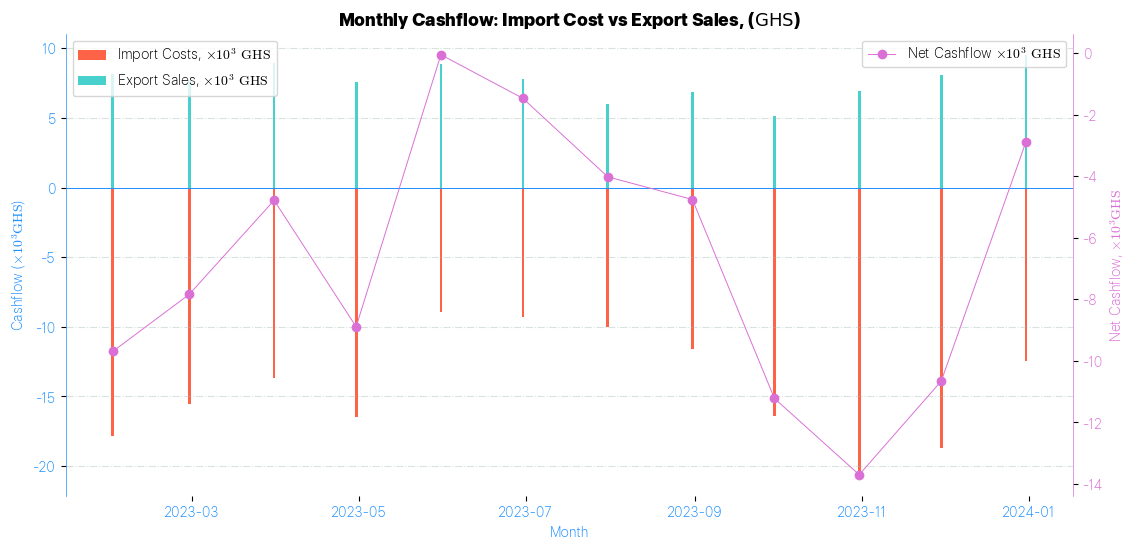

In [57]:
# Plot 3: Cashflow of imports versus exports
# Customize the plot appearance
grid_color = '#A0B8B1'
cost_color = 'tomato'
sales_color = 'mediumturquoise'
net_color = 'orchid'
ticks_color = 'dodgerblue'

# Sort by index (Datetime) to maintain order
df = bal_sheet.sort_index()

# Convert all GHS values to thousands (GHS × 10³)
df['Imported GHS'] /= 1000
df['Exported GHS'] /= 1000

# Compute Net Cashflow
df['Net Cashflow'] = df['Exported GHS'] - df['Imported GHS']

# Create the figure
fig, ax1 = plt.subplots(figsize=(13, 6))

# Stacked bar chart using index as x-axis
ax1.bar(df.index, -df['Imported GHS'], width = 1, color=cost_color, label = r'Import Costs, $\times 10^3\text{ GHS}$')
ax1.bar(df.index, df['Exported GHS'], width = 1, color=sales_color, label = r'Export Sales, $\times 10^3\text{ GHS}$')

# Create a second y-axis for Net Cashflow
ax2 = ax1.twinx()
ax2.plot(df.index, df['Net Cashflow'], color=net_color, linewidth=0.7, marker='o', label=r'Net Cashflow $\times 10^3\text{ GHS}$')

# Labels and formatting
ax1.set_xlabel('Month', color=ticks_color)
ax2.set_ylabel(r'Net Cashflow, $\times 10^3\text{GHS}$', color=net_color)
ax1.set_ylabel(r'Cashflow ($\times 10^3\text{GHS}$)', color=ticks_color)
ax1.tick_params(axis='y', labelcolor=ticks_color)
ax2.tick_params(axis='y', labelcolor=net_color)
ax1.tick_params(axis='x', labelcolor=ticks_color)

ax2.spines['right'].set_color(net_color)
ax1.spines['left'].set_color(ticks_color)    # Left border

ax1.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax1.spines['right'].set_linewidth(0.0)
ax1.spines['bottom'].set_linewidth(0.0)
ax1.spines['left'].set_linewidth(0.5)

ax2.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax2.spines['right'].set_linewidth(0.5)
ax2.spines['bottom'].set_linewidth(0.0)
ax2.spines['left'].set_linewidth(0.0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid and title
ax1.grid(axis='y', linestyle='-.', alpha=0.4, color=grid_color)
ax1.axhline(0, color=ticks_color, linewidth=0.7)  # Add a zero reference line
plt.title(r"Monthly Cashflow: Import Cost vs Export Sales, ($\text{GHS}$)", fontproperties=eloquia_title)

# legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Format Y-axis with comma separators
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Show the plot
plt.savefig('img_monthly_cashflow_of_imports_vs_exports.png', dpi = 320)
plt.show()
# Show the plot
plt.show()

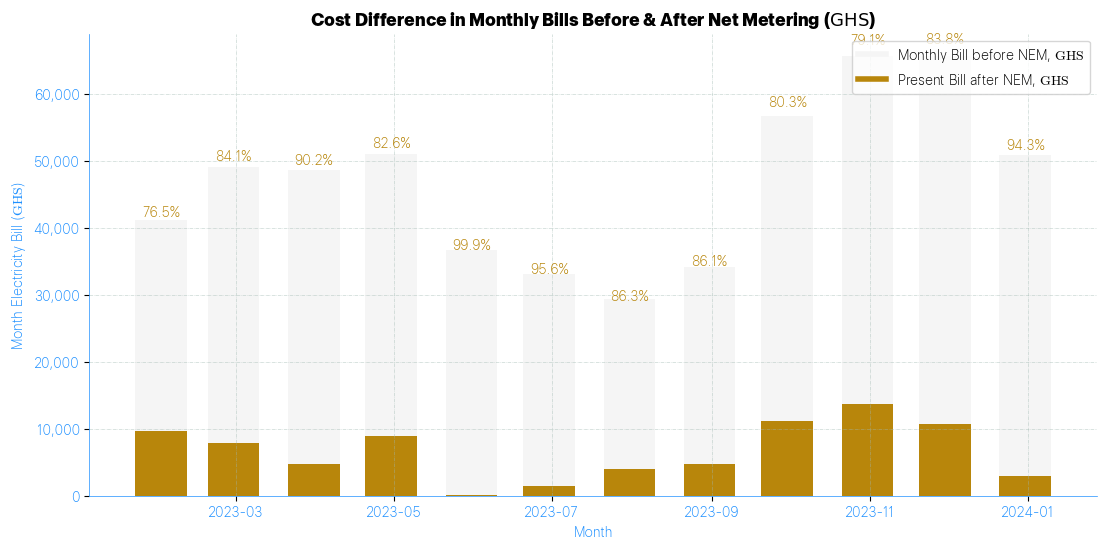

In [58]:
# Plot 4: Savings in Cost
# Customize the plot appearance
grid_color = '#A0B8B1'
previous_payable = 'whitesmoke'
present_payable = 'darkgoldenrod'
ticks_color = 'dodgerblue'

# Sort by index (Datetime) to maintain order
df = bal_sheet.sort_index()

# Create the figure
fig, ax = plt.subplots(figsize=(13, 6))

# Stacked bar chart using index as x-axis
ax.bar(df.index, df['Net Monthly GHS'], width=20, color=present_payable)
bars = ax.bar(df.index, df['Present Billed GHS'] - df['Net Monthly GHS'], bottom=df['Net Monthly GHS'], 
       width=20, color=previous_payable)

# Add percentage savings labels on top of each bar
for bar, savings_pct in zip(bars, df['Savings (%)']):
    height = 1.07*bar.get_y() + 1.049*bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f"{savings_pct:.1%}", ha='center', va='top', fontsize=10, color=present_payable)


# Labels and formatting
ax.set_xlabel('Month', color=ticks_color)
ax.set_ylabel(r'Month Electricity Bill ($\text{GHS}$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)

ax.spines['top'].set_color(ticks_color)     # Top border
ax.spines['right'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)  # Bottom border
ax.spines['left'].set_color(ticks_color)    # Left border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid and title
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.title(r"Cost Difference in Monthly Bills Before & After Net Metering ($\text{GHS}$)", fontproperties=eloquia_title)

# legend
legend_elements = [Line2D([0], [0], color=previous_payable, lw=4, label=r'Monthly Bill before NEM, $\text{GHS}$'), Line2D([0], [0], color=present_payable, lw=4, label=r'Present Bill after NEM, $\text{GHS}$')]
ax.legend(handles=legend_elements, loc='upper right', frameon=True)

# Show the plot
plt.savefig('img_monthly_cost_difference_before_and_after_NEM.png', dpi = 320)
plt.show()

# Show the plot
plt.show()

<br><br>

### Annual Savings and Deficits per n

In [59]:
# this will evaluate how much we save per each n
ns = []
savs = []
for __ in range(0, n_max):
    _, _, _, savings = get_annual_savings(__)
    ns.append(__); savs.append(savings*100)

savings_deficits_per_n = pd.DataFrame({'n':ns, 'Savings %': savs, 'Deficit kWh': np.array(deficits['Deficit, kWh'])})
savings_deficits_per_n

,n,Savings %,Deficit kWh
0,0,0.000000,-248204.795200
1,1,0.000000,-247292.468767
2,2,0.000000,-246380.142335
3,3,0.000000,-245467.815902
4,4,0.000000,-244555.489470
...,...,...,...
495,495,132.828024,203396.788929
496,496,133.004798,204309.115361
497,497,133.181537,205221.441794
498,498,133.358243,206133.768227


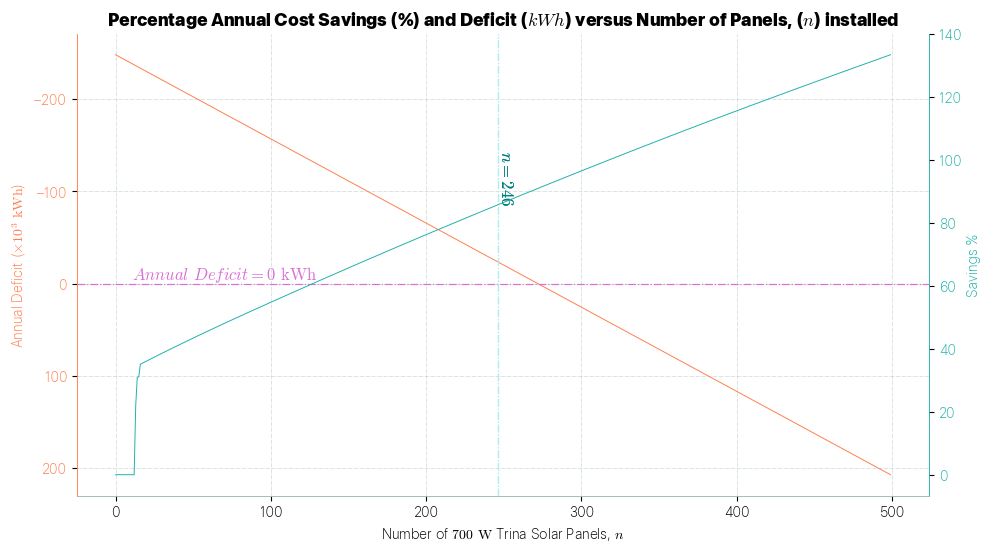

In [82]:
# Customize the plot appearance
border_color = '#A0B8B1'
deficit_color = 'coral'
savings_color = 'lightseagreen'

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(11, 6))

# Plot Savings % on the primary y-axis
ax1.plot(savings_deficits_per_n['n'], savings_deficits_per_n['Deficit kWh'] / 1000, color=deficit_color, linewidth = 0.7, label='Deficit kWh')
ax1.set_xlabel(r'Number of $700\text{ W}$ Trina Solar Panels, $n$')
ax1.set_ylabel(r'Annual Deficit ($\times 10^3\text{ kWh}$)', color=deficit_color)
ax1.tick_params(axis='y', labelcolor=deficit_color)

# Flip the left y-axis (Deficit kWh)
ax1.invert_yaxis()  # Negative values will now be at the top

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(savings_deficits_per_n['n'], savings_deficits_per_n['Savings %'], color=savings_color, linewidth = 0.7, label='Savings %')
ax2.set_ylabel('Savings %', color=savings_color)
ax2.tick_params(axis='y', labelcolor=savings_color)

# Add grid and title
ax1.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
plt.title('Percentage Annual Cost Savings (%) and Deficit ($kWh$) versus Number of Panels, ($n$) installed', fontproperties=eloquia_title)

#ax1.spines['top'].set_color(border_color)     # Top border
ax1.spines['right'].set_color(savings_color)   # Right border
ax1.spines['bottom'].set_color(border_color)  # Bottom border
ax1.spines['left'].set_color(deficit_color)    # Left border
ax2.spines['right'].set_color(savings_color)   # Right border
ax2.spines['bottom'].set_color(border_color)  # Bottom border
ax2.spines['left'].set_color(deficit_color)    # Left border

ax1.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax1.spines['right'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax2.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax2.spines['right'].set_linewidth(0.5)
ax2.spines['bottom'].set_linewidth(0.5)
ax2.spines['left'].set_linewidth(0.5)

ax1.axhline(0, color='orchid', linewidth=0.87, linestyle='-.')
#ax1.axhline(1.701, color='lightpink', linewidth=0.87, linestyle='-.')
ax1.axvline(n, color='paleturquoise', linewidth=0.87, linestyle='-.')
ax1.axvline(n_clause36, color='paleturquoise', linewidth=0.87, linestyle='-.')

# Annotate equation for the horizontal line (y = 0) PERPENDICULAR to it
ax1.text(70, 0.5, r"$Annual\text{ }Deficit = 0\text{ kWh}$", color="orchid", fontsize=12, fontweight="bold", rotation=0, ha='center', va='bottom')
# Annotate equation for the vertical line (x = n) PERPENDICULAR to it
ax1.text(n + 0.2, -max(ax1.get_ylim())/2, rf"$n = {n} $", color="teal", fontsize=12, fontweight="bold", rotation=270, ha='left', va='center')
ax1.text(n_clause36 + 0.2, -max(ax1.get_ylim())/2, rf"$n = {n_clause36} $", color="teal", fontsize=12, fontweight="bold", rotation=270, ha='left', va='center')

# Show the plot
plt.savefig('img_savings_deficit_per_n.png', dpi = 320)
plt.show()

## CASHFLOW




### Inverter Sizing

In [152]:
# solar panel capacity
kWp = n_clause36 * PV_kW

cost_PV = n * 2_500
euro_rate = 16.17
sma_150_21 = 9863+500 #price in euro
cost_Inverter = euro_rate * sma_150_21
cost_Wire = 100 * 500  # assuming an average of GHS 100 per m
cost_install = 0.4 * (cost_PV + cost_Inverter + cost_Wire)
capital_cost = cost_install + cost_PV + cost_Inverter + cost_Wire

o_and_m_cost_percentage = 0.04  # 2% of initial investment per year 
annual_O_and_M = o_and_m_cost_percentage * capital_cost

n_years = 25 # project life is 25 years
capital_cost

1165597.594

### Cashflow

In [149]:
_, annual_savings, _, _ = get_annual_savings(n_clause36)
annual_savings

482853.4200514941

In [86]:
def get_cashflows_at_i_(r_l = Decimal('0.25'), r_i = Decimal('0.14')):
    _, annual_savings, _, _ = get_annual_savings(n)

    project_lifetime = 25  # years
    loan_interest_rate = r_l  # 25% loan interest rate
    invest_interest_rate = r_i
    discount_rate = 0.12  # 12% discount rate

    years = np.arange(0, n_years+1)

    principals = []
    annual_payments = []
    remaining = []

    principal = -1 * capital_cost; payment = 0; # at year 0.
    for year in years:
        principals.append(principal)
        annual_payments.append(principal if year == 0 else payment)
        rem = principal + payment
        interest_rate = loan_interest_rate if rem < 0 else invest_interest_rate
        remaining.append(rem)
        payment = annual_savings - annual_O_and_M
        principal = float(1 + interest_rate) * rem

    cashflow = pd.DataFrame({'Year': years, 'Principals, GHS': principals, 'Annual Flow, GHS': annual_payments, 'Remaining Debt, GHS': remaining})
    return cashflow

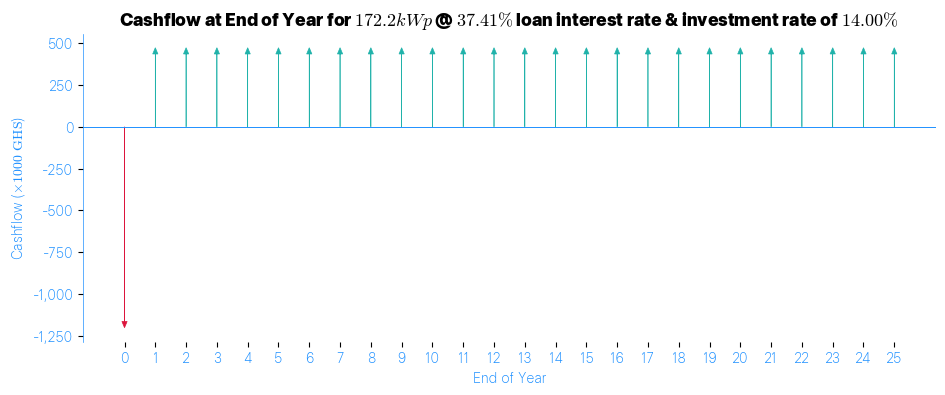

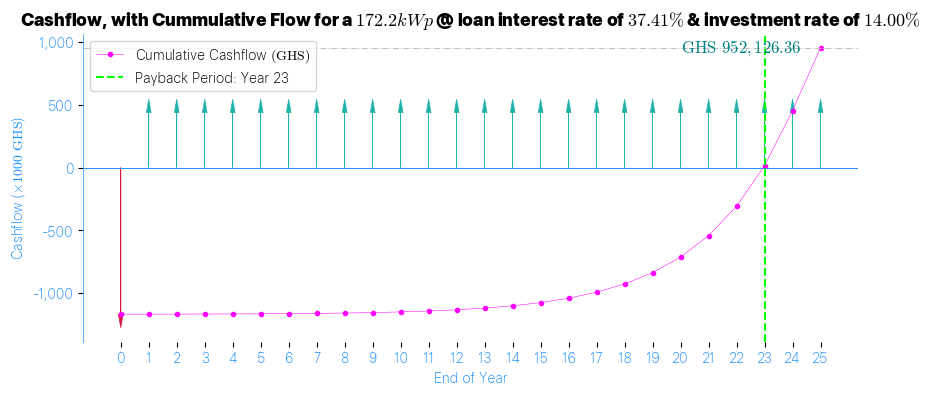

In [145]:
# Plot 1: Annual Monthly PV kWh on Demand kWh
# Customize the plot appearance
grid_color = '#A0B8B1'
pos_cashflow_color = 'lightseagreen'
neg_cashflow_color = 'crimson'
ticks_color = 'dodgerblue'


# Sort by index (Datetime) to maintain order
r_i = Decimal('0.14'); r_l = Decimal('0.3741')
cashflow = get_cashflows_at_i_(r_i = r_i, r_l = r_l)
df = cashflow[['Year', 'Annual Flow, GHS',	'Remaining Debt, GHS']].copy()
df['Annual Flow, GHS'] /= 1000
df['Remaining Debt, GHS'] /= 1000

# Create the figure
fig, ax = plt.subplots(figsize=(11, 4))

# Plot upward arrows using quiver
for i, h in enumerate(df['Annual Flow, GHS']):
    if h > 0:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=37.5, fc=pos_cashflow_color, ec=pos_cashflow_color, linewidth=0.47)
    else:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=37.5, fc=neg_cashflow_color, ec=neg_cashflow_color, linewidth=0.47)

# Labels and formatting
ax.set_xlabel('End of Year', color=ticks_color)
ax.set_ylabel(r'Cashflow ($\times1000\text{ GHS}$)', color=ticks_color)
ax.set_xticks(df['Year'])
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

ax.spines['left'].set_color(ticks_color)   # Right border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.0)
ax.spines['left'].set_linewidth(0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid and title
# ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
ax.axhline(0, color=ticks_color, linewidth=0.7)  # Add a zero reference line
plt.title(rf"Cashflow at End of Year for ${kWp} kWp$ @ ${r_l*100}\%$ loan interest rate & investment rate of ${r_i * 100: 0.2f}\%$ ", fontproperties=eloquia_title)

# Show the plot
plt.savefig(f'img_project_cashflow_@_r={r_l * 100}_i={r_i * 100}_n={n}.png', dpi = 320)
plt.show()

############################################################################################################

# Create the figure
fig, ax = plt.subplots(figsize=(10, 4))

# Plot upward arrows using quiver
for i, h in enumerate(df['Annual Flow, GHS']):
    if h > 0:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=107.5, fc=pos_cashflow_color, ec=pos_cashflow_color, linewidth=0.47)
    else:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=107.5, fc=neg_cashflow_color, ec=neg_cashflow_color, linewidth=0.47)

# Cummulative cash flow
plt.plot(df.index, df['Remaining Debt, GHS'], marker='o', markersize=3, linestyle='-', color='fuchsia', label=r"Cumulative Cashflow $\text{(GHS)}$", linewidth=0.37)

# Identify the payback period (first year where cumulative cashflow is positive)
payback_period_index = np.where(df['Remaining Debt, GHS'] > 0)[0][0] if np.any(df['Remaining Debt, GHS'] > 0) else None
payback_period_year = df['Year'][payback_period_index] if payback_period_index is not None else None

# Highlight Payback Period
if payback_period_year:
    plt.axvline(payback_period_year, color='lime', linestyle='--', linewidth=1.5, label=f"Payback Period: Year {payback_period_year}")
    

# Labels and formatting
ax.set_xlabel('End of Year', color=ticks_color)
ax.set_ylabel(r'Cashflow ($\times1000\text{ GHS}$)', color=ticks_color)
ax.set_xticks(df['Year'])
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

ax.spines['left'].set_color(ticks_color)   # Right border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.0)
ax.spines['left'].set_linewidth(0.5)

# Add grid and title
ax.axhline(0, color=ticks_color, linewidth=0.7)  # Add a zero reference line
ax.axhline(list(df['Remaining Debt, GHS'])[-1], color='silver', linewidth=0.7, linestyle='-.')  # Add a zero reference line
ax.text(20, list(df['Remaining Debt, GHS'])[-1], rf"$\text{{GHS }}{1000*list(df['Remaining Debt, GHS'])[-1]:,.2f}$", color="teal", fontsize=12, fontweight="bold", rotation=0, ha='left', va='center')
plt.title(rf"Cashflow, with Cummulative Flow for a ${kWp} kWp$ @ loan interest rate of ${r_l * 100}\%$ & investment rate of ${r_i * 100: 0.2f}\%$", fontproperties=eloquia_title)
plt.legend()

# Show the plot
plt.savefig(f'img_project_cashflow[with cummulative flow]_@_r={r_l * 100}_i={r_i * 100}_n={n}.png', dpi = 320)
plt.show()

## NPV and IRR

In [146]:
get_NPV(0.31)

315059.71357798856

In [136]:
# Define Parameters
def get_NPV(discount_rate = 0.12):
    _, annual_savings, _, _ = get_annual_savings(n)
    initial_investment = capital_cost  # GHS (Initial capital cost)

    # Compute annual O&M cost
    annual_o_and_m_cost = initial_investment *  0.02 #o_and_m_cost_percentage

    # Generate discount factors for each year
    years = np.arange(1, project_lifetime + 1)
    discount_factors = (1 + discount_rate) ** years

    # Compute Net Cashflows (Annual Savings - O&M Costs)
    annual_cashflows = (annual_savings - annual_o_and_m_cost) / discount_factors

    # Compute NPV considering discount rate
    npv = sum(annual_cashflows) - initial_investment

    return npv

In [137]:
# Given data
discount_rates = np.linspace(0.10, 0.45, 500)  # Discount rates from 0% to 30%
npvs = [get_NPV(discount_rate)/1000 for discount_rate in discount_rates]
df_npvs = pd.DataFrame({'Discount Rates %':discount_rates, 'NPV (GHS)':npvs})

# Computing irr
pos_df_npvs = df_npvs[df_npvs['NPV (GHS)'] > 0]
neg_df_npvs = df_npvs[df_npvs['NPV (GHS)'] < 0]
r1, NPV1 = pos_df_npvs[['Discount Rates %', 'NPV (GHS)']].iloc[len(pos_df_npvs)-1]
r2, NPV2 = neg_df_npvs[['Discount Rates %', 'NPV (GHS)']].iloc[0]
irr = r1 + ((NPV1)/(NPV1 - NPV2)) * (r2 - r1)

print(f'{irr:0.6f}')

0.394157


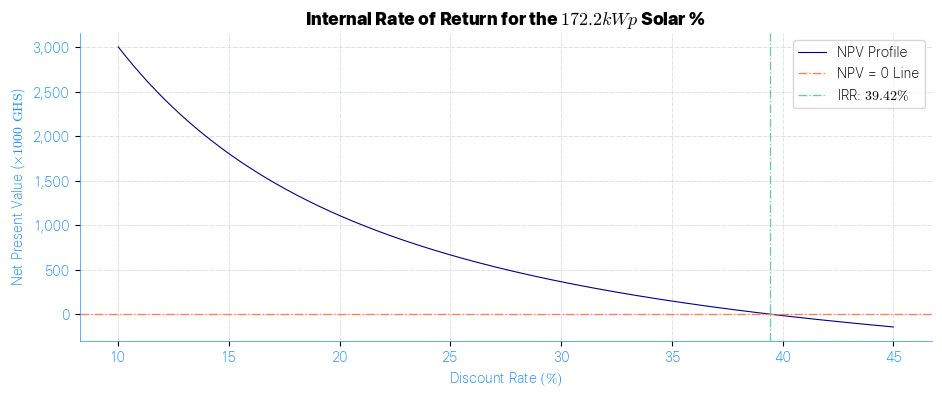

In [138]:
# Customize the plot appearance
grid_color = '#A0B8B1'
npv_color = 'darkblue'
ticks_color = 'dodgerblue'

# Create the figure
fig, ax = plt.subplots(figsize=(11, 4))
plt.plot(df_npvs['Discount Rates %'] * 100, df_npvs['NPV (GHS)'], label="NPV Profile", color=npv_color, linewidth=0.8)


# Labels and formatting
ax.set_xlabel(r'Discount Rate $(\%)$', color=ticks_color)
ax.set_ylabel(r'Net Present Value ($\times1000\text{ GHS}$)', color=ticks_color)
#ax.set_xticks(df_npvs['Discount Rates %'] * 100)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

ax.spines['left'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)

irr = Decimal(f'{irr:0.5f}')
plt.axhline(0, color='coral', linestyle="-.", label="NPV = 0 Line", linewidth = 0.97)
plt.axvline(irr*100, color='mediumaquamarine', linestyle="-.", label=rf"IRR: ${irr*100}\%$", linewidth = 0.97)
plt.legend()
plt.title(rf"Internal Rate of Return for the ${kWp} kWp$ Solar %", fontproperties=eloquia_title)

plt.savefig('img_internal_rate_of_return.png', dpi=320)
plt.show()

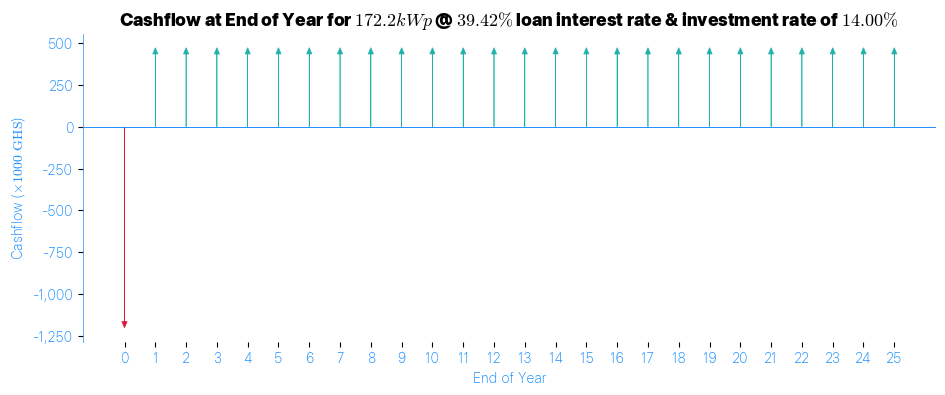

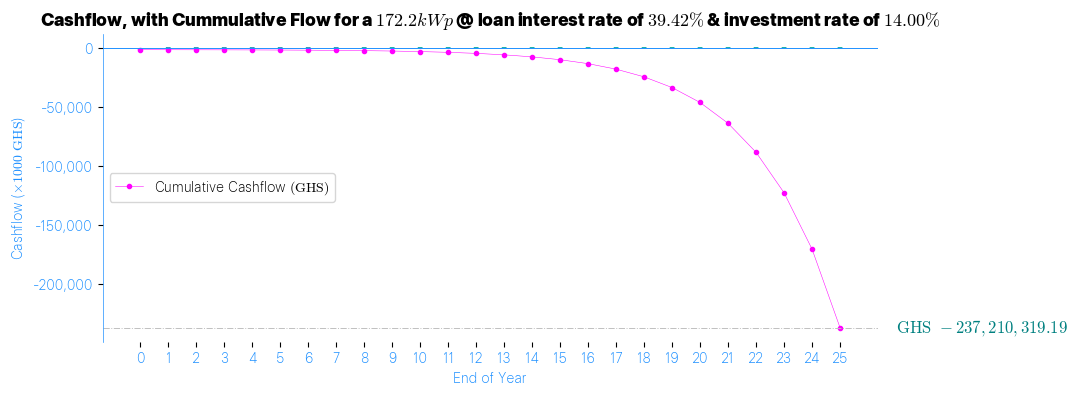

In [139]:
# Plot 1: Annual Monthly PV kWh on Demand kWh
# Customize the plot appearance
grid_color = '#A0B8B1'
pos_cashflow_color = 'lightseagreen'
neg_cashflow_color = 'crimson'
ticks_color = 'dodgerblue'


# Sort by index (Datetime) to maintain order
r_i = Decimal('0.14'); r_l = irr
cashflow = get_cashflows_at_i_(r_i = r_i, r_l = r_l)
df = cashflow[['Year', 'Annual Flow, GHS',	'Remaining Debt, GHS']].copy()
df['Annual Flow, GHS'] /= 1000
df['Remaining Debt, GHS'] /= 1000

# Create the figure
fig, ax = plt.subplots(figsize=(11, 4))

# Plot upward arrows using quiver
for i, h in enumerate(df['Annual Flow, GHS']):
    if h > 0:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=37.5, fc=pos_cashflow_color, ec=pos_cashflow_color, linewidth=0.47)
    else:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=37.5, fc=neg_cashflow_color, ec=neg_cashflow_color, linewidth=0.47)

# Labels and formatting
ax.set_xlabel('End of Year', color=ticks_color)
ax.set_ylabel(r'Cashflow ($\times1000\text{ GHS}$)', color=ticks_color)
ax.set_xticks(df['Year'])
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

ax.spines['left'].set_color(ticks_color)   # Right border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.0)
ax.spines['left'].set_linewidth(0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid and title
# ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)
ax.axhline(0, color=ticks_color, linewidth=0.7)  # Add a zero reference line
plt.title(rf"Cashflow at End of Year for ${kWp} kWp$ @ ${r_l*100}\%$ loan interest rate & investment rate of ${r_i * 100: 0.2f}\%$ ", fontproperties=eloquia_title)

# Show the plot
plt.savefig(f'img_project_cashflow_@_r={r_l * 100}_i={r_i * 100}_n={n}.png', dpi = 320)
plt.show()

############################################################################################################

# Create the figure
fig, ax = plt.subplots(figsize=(10, 4))

# Plot upward arrows using quiver
for i, h in enumerate(df['Annual Flow, GHS']):
    if h > 0:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=107.5, fc=pos_cashflow_color, ec=pos_cashflow_color, linewidth=0.47)
    else:
        ax.arrow(i, 0, 0, h, head_width=0.17, head_length=107.5, fc=neg_cashflow_color, ec=neg_cashflow_color, linewidth=0.47)

# Cummulative cash flow
plt.plot(df.index, df['Remaining Debt, GHS'], marker='o', markersize=3, linestyle='-', color='fuchsia', label=r"Cumulative Cashflow $\text{(GHS)}$", linewidth=0.37)

# Identify the payback period (first year where cumulative cashflow is positive)
payback_period_index = np.where(df['Remaining Debt, GHS'] > 0)[0][0] if np.any(df['Remaining Debt, GHS'] > 0) else None
payback_period_year = df['Year'][payback_period_index] if payback_period_index is not None else None

# Highlight Payback Period
if payback_period_year:
    plt.axvline(payback_period_year, color='lime', linestyle='--', linewidth=1.5, label=f"Payback Period: Year {payback_period_year}")
    

# Labels and formatting
ax.set_xlabel('End of Year', color=ticks_color)
ax.set_ylabel(r'Cashflow ($\times1000\text{ GHS}$)', color=ticks_color)
ax.set_xticks(df['Year'])
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

ax.spines['left'].set_color(ticks_color)   # Right border

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.0)
ax.spines['left'].set_linewidth(0.5)

# Add grid and title
ax.axhline(0, color=ticks_color, linewidth=0.7)  # Add a zero reference line
ax.axhline(list(df['Remaining Debt, GHS'])[-1], color='silver', linewidth=0.7, linestyle='-.')  # Add a zero reference line
ax.text(27, list(df['Remaining Debt, GHS'])[-1], rf"$\text{{GHS }}{1000*list(df['Remaining Debt, GHS'])[-1]:,.2f}$", color="teal", fontsize=12, fontweight="bold", rotation=0, ha='left', va='center')
plt.title(rf"Cashflow, with Cummulative Flow for a ${kWp} kWp$ @ loan interest rate of ${r_l * 100}\%$ & investment rate of ${r_i * 100: 0.2f}\%$", fontproperties=eloquia_title)
plt.legend()

# Show the plot
plt.savefig(f'img_project_cashflow[with cummulative flow]_@_r={r_l * 100}_i={r_i * 100}_n={n}.png', dpi = 320)
plt.show()

## LCOE

In [166]:
def compute_lcoe(discount_rate, project_lifetime = 25):
    annual_energy = 224432.30
    
    # Create an array for each year (from 1 to project_lifetime)
    years = np.arange(1, project_lifetime + 1)
    
    # Compute the discount factors for each year
    discount_factors = (1 + discount_rate) ** years
    
    # Compute the present value of the annual O&M costs over the project lifetime
    pv_o_and_m = np.sum(annual_O_and_M / discount_factors)
    
    # Compute the present value of the annual energy production over the project lifetime
    pv_energy = np.sum(annual_energy / discount_factors)
    
    # Total cost includes the initial capital cost plus the discounted O&M costs
    total_cost = capital_cost + pv_o_and_m
    
    # Calculate LCOE as total cost divided by the total discounted energy production
    lcoe = total_cost / pv_energy
    
    return lcoe

In [177]:
# Given data
discount_rates = np.linspace(0.010, 0.40, 500)  # Discount rates from 0% to 30%
lcoes = [compute_lcoe(discount_rate)*100 for discount_rate in discount_rates]
df_lcoes = pd.DataFrame({'Discount Rates %':discount_rates, 'LCOE (GHp/kWh)':lcoes})
df_lcoes

,Discount Rates %,LCOE (GHp/kWh)
0,0.010000,44.356319
1,0.010782,44.584762
2,0.011563,44.814495
3,0.012345,45.045514
4,0.013126,45.277817
...,...,...
495,0.396874,226.940474
496,0.397655,227.345803
497,0.398437,227.751139
498,0.399218,228.156482


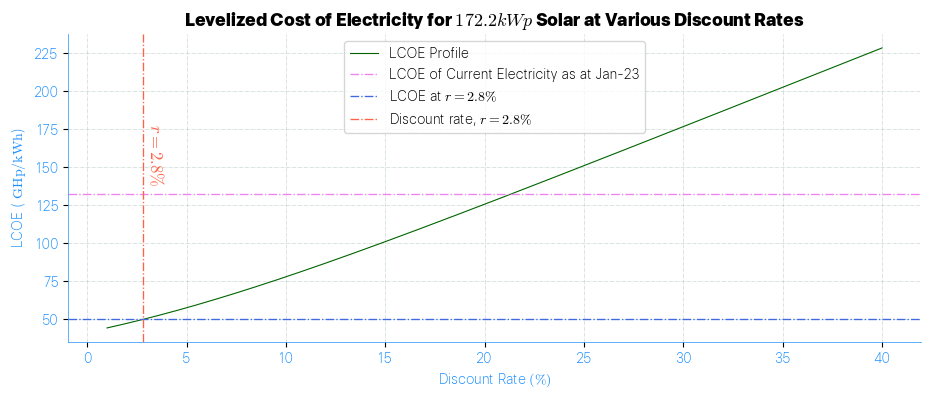

In [201]:
# Customize the plot appearance
grid_color = '#A0B8B1'
lcoe_color = 'darkgreen'
ticks_color = 'dodgerblue'

# Create the figure
fig, ax = plt.subplots(figsize=(11, 4))
plt.plot(df_lcoes['Discount Rates %'] * 100, df_lcoes['LCOE (GHp/kWh)'], label="LCOE Profile", color=lcoe_color, linewidth=0.8)


# Labels and formatting
ax.set_xlabel(r'Discount Rate $(\%)$', color=ticks_color)
ax.set_ylabel(r'LCOE ($\text{ GHp/kWh}$)', color=ticks_color)
ax.tick_params(axis='y', labelcolor=ticks_color)
ax.tick_params(axis='x', labelcolor=ticks_color)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

ax.spines['left'].set_color(ticks_color)   # Right border
ax.spines['bottom'].set_color(ticks_color)

ax.spines['top'].set_linewidth(0.0)           # Set thickness of borders (optional)
ax.spines['right'].set_linewidth(0.0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.grid(True, linestyle='-.', alpha=0.7, color='#A0B8B1', linewidth=0.4)

plt.axhline(132.61, color='violet', linestyle="-.", label="LCOE of Current Electricity as at Jan-23", linewidth = 0.97)
plt.axhline(50, color='royalblue', linestyle="-.", label=r"LCOE at $r=2.8\%$", linewidth = 0.97)
plt.axvline(2.8, color='tomato', linestyle="-.", label=rf"Discount rate, $r= 2.8\%$", linewidth = 0.97)
ax.text(2.8 + 0.2, 2*max(ax.get_ylim())/3, r"$r = 2.8\% $", color="tomato", fontsize=12, fontweight="bold", rotation=270, ha='left', va='center')
plt.legend()
plt.title(rf"Levelized Cost of Electricity for ${kWp} kWp$ Solar at Various Discount Rates", fontproperties=eloquia_title)

plt.savefig('img_lcoe.png', dpi=320)
plt.show()

In [181]:
compute_lcoe(0.08)

0.6942657684826636

In [182]:
compute_lcoe(0.31)

1.8196242088861658